In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import seaborn as sns



In [75]:
# Load Data from Disk

couteractions = pd.read_csv("../Data/Raw/Covid-Counteractions/Bundesland_Oberkategorie.csv")

In [76]:
# Remove Columns

couteractions.drop(["_id", "ags2"], axis=1, inplace=True) # Identifier for the row and federalstate

#couteractions.drop(["m_code_m16"], axis=1, inplace=True) # Maskenpflicht
#couteractions.drop(["m_code_m20"], axis=1, inplace=True) # Abstandsregelung
couteractions.drop(["m_code_m21"], axis=1, inplace=True) # Test-Maßnahmen

In [77]:
# Convert Coloums to concrete Datatypes

columns = ["m_code_m01a", "m_code_m01b",
            "m_code_m02a", "m_code_m02b",
            "m_code_m03", "m_code_m04",
            "m_code_m05", "m_code_m06",
            "m_code_m07", "m_code_m08",
            "m_code_m09", "m_code_m10",
            "m_code_m11", "m_code_m12",
            "m_code_m13", "m_code_m14",
            "m_code_m15", "m_code_m17",
            "m_code_m18", "m_code_m19",
            "m_code_m16","m_code_m20"]

couteractions[columns] = couteractions[columns].astype("boolean")

In [78]:
# Rename Columns

couteractions.rename({"bundesland": "Bundesland",
                        "datum": "Datum",
                        "m_code_m01a": "Kontaktbeschränkung Privatpersonen im privatem Raum",
                        "m_code_m01b": "Kontaktbeschränkung Privatpersonen im öffentlichen Raum",
                        "m_code_m02a": "Weiterführende Schulen",
                        "m_code_m02b": "Grundschulen",
                        "m_code_m03": "Kitas",
                        "m_code_m04": "Öffentliche Events & Veranstaltungen Indoor",
                        "m_code_m05": "Öffentliche Events & Veranstaltungen Outdoor",
                        "m_code_m06": "Kultur- & Bildungseinrichtungen",
                        "m_code_m07": "Groß- & Einzelhandel",
                        "m_code_m08": "Gastronomie",
                        "m_code_m09": "Dienstleistungen & Handwerk",
                        "m_code_m10": "Einrichtungen des Nachtlebens",
                        "m_code_m11": "Beherbergung",
                        "m_code_m12": "Sport Indoor",
                        "m_code_m13": "Sport Outdoor",
                        "m_code_m14": "Reisebeschränkung Inland",
                        "m_code_m15": "Reisebeschränkung Ausland",
                        "m_code_m17": "Arbeitsplatzbeschränkung",
                        "m_code_m18": "Ausgangsbeschränkung",
                        "m_code_m19": "Kapazitätsbeschränkung im öffentlichen Verkehr",
                        "m_code_m16": "Maskenpflicht",
                        "m_code_m20": "Abstandsregelung"
                          }, axis=1, inplace=True)  

In [79]:
# Create Output Folder for PM10 if not allready present

import os

output_path = "../Data/Output/Covid-Counteractions"

if not os.path.exists(output_path):
   os.makedirs(output_path)

# Save Dataset to Disk

couteractions.to_csv(output_path + "/Bundesland_Oberkategorie.csv", index=False)

In [80]:
# Example to Load the Data

couteractions_test = pd.read_csv(output_path + "/Bundesland_Oberkategorie.csv", 
                                        parse_dates = ["Datum"])

In [81]:
couteractions_test

Bundesland      Datum  \
0      Schleswig-Holstein 2020-03-01   
1      Schleswig-Holstein 2020-03-02   
2      Schleswig-Holstein 2020-03-03   
3      Schleswig-Holstein 2020-03-04   
4      Schleswig-Holstein 2020-03-05   
...                   ...        ...   
16571           Thüringen 2022-12-27   
16572           Thüringen 2022-12-28   
16573           Thüringen 2022-12-29   
16574           Thüringen 2022-12-30   
16575           Thüringen 2022-12-31   

       Kontaktbeschränkung Privatpersonen im privatem Raum  \
0                                                  False     
1                                                  False     
2                                                  False     
3                                                  False     
4                                                  False     
...                                                  ...     
16571                                              False     
16572                                              False     
16573                                              False     
16574                                              False     
16575                                              False     

       Kontaktbeschränkung Privatpersonen im öffentlichen Raum  \
0                                                  False         
1                                                  False         
2                                                  False         
3                                                  False         
4                                                  False         
...                                                  ...         
16571                                              False         
16572                                              False         
16573                                              False         
16574                                              False         
16575                                              False         

       Weiterführende Schulen  Grundschulen  Kitas  \
0                       False         False  False   
1                       False         False  False   
2                       False         False  False   
3                       False         False  False   
4                       False         False  False   
...                       ...           ...    ...   
16571                    True          True   True   
16572                    True          True   True   
16573                    True          True   True   
16574                    True          True   True   
16575                    True          True   True   

       Öffentliche Events & Veranstaltungen Indoor  \
0                                            False   
1                                            False   
2                                            False   
3                                            False   
4                                            False   
...                                            ...   
16571                                        False   
16572                                        False   
16573                                        False   
16574                                        False   
16575                                        False   

       Öffentliche Events & Veranstaltungen Outdoor  \
0                                             False   
1                                             False   
2                                             False   
3                                             False   
4                                             False   
...                                             ...   
16571                                         False   
16572                                         False   
16573                                         False   
16574                                         False   
16575                                         False   

       Kultur- & Bildungseinrichtunge

In [89]:
couteractions.sort_values('Bundesland')

Bundesland       Datum  \
8287   Baden-Württemberg  2022-12-31   
7933   Baden-Württemberg  2022-01-11   
7934   Baden-Württemberg  2022-01-12   
7935   Baden-Württemberg  2022-01-13   
7936   Baden-Württemberg  2022-01-14   
...                  ...         ...   
15890          Thüringen  2021-02-14   
15891          Thüringen  2021-02-15   
15892          Thüringen  2021-02-16   
15862          Thüringen  2021-01-17   
16575          Thüringen  2022-12-31   

       Kontaktbeschränkung Privatpersonen im privatem Raum  \
8287                                               False     
7933                                                True     
7934                                                True     
7935                                                True     
7936                                                True     
...                                                  ...     
15890                                               True     
15891                                               True     
15892                                               True     
15862                                               True     
16575                                              False     

       Kontaktbeschränkung Privatpersonen im öffentlichen Raum  \
8287                                               False         
7933                                                True         
7934                                                True         
7935                                                True         
7936                                                True         
...                                                  ...         
15890                                               True         
15891                                               True         
15892                                               True         
15862                                               True         
16575                                              False         

       Weiterführende Schulen  Grundschulen  Kitas  \
8287                     True          True   True   
7933                     True          True  False   
7934                     True          True  False   
7935                     True          True  False   
7936                     True          True  False   
...                       ...           ...    ...   
15890                    True          True  False   
15891                    True          True  False   
15892                    True          True  False   
15862                    True          True  False   
16575                    True          True   True   

       Öffentliche Events & Veranstaltungen Indoor  \
8287                                         False   
7933                                         False   
7934                                         False   
7935                                         False   
7936                                         False   
...                                            ...   
15890                                         True   
15891                                         True   
15892                                         True   
15862                                         True   
16575                                        False   

       Öffentliche Events & Veranstaltungen Outdoor  \
8287                                          False   
7933                                           True   
7934                                           True   
7935                                           True   
7936                                           True   
...                                             ...   
15890                                          True   
15891                                          True   
15892                                          True   
15862                                          True   
16575                                         False   

       Kultur- & Bildungseinrichtung

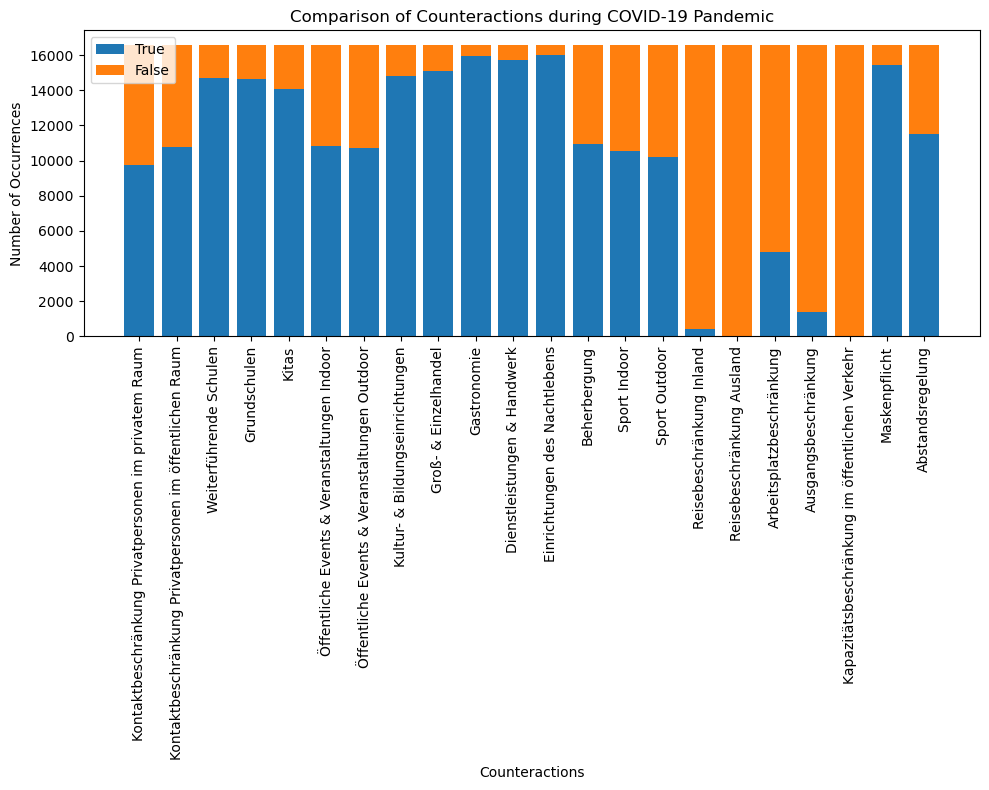

In [88]:
x_labels = ["Kontaktbeschränkung Privatpersonen im privatem Raum",
             "Kontaktbeschränkung Privatpersonen im öffentlichen Raum",
             "Weiterführende Schulen",
             "Grundschulen",
             "Kitas",
             "Öffentliche Events & Veranstaltungen Indoor",
             "Öffentliche Events & Veranstaltungen Outdoor",
             "Kultur- & Bildungseinrichtungen",
             "Groß- & Einzelhandel",
             "Gastronomie",
             "Dienstleistungen & Handwerk",
             "Einrichtungen des Nachtlebens",
             "Beherbergung",
             "Sport Indoor",
             "Sport Outdoor",
             "Reisebeschränkung Inland",
             "Reisebeschränkung Ausland",
             "Arbeitsplatzbeschränkung",
             "Ausgangsbeschränkung",
             "Kapazitätsbeschränkung im öffentlichen Verkehr",
               "Maskenpflicht",
               "Abstandsregelung"]

true_values = [couteractions_test["Kontaktbeschränkung Privatpersonen im privatem Raum"].sum(),
               couteractions_test["Kontaktbeschränkung Privatpersonen im öffentlichen Raum"].sum(),
               couteractions_test["Weiterführende Schulen"].sum(),
               couteractions_test["Grundschulen"].sum(),
               couteractions_test["Kitas"].sum(),
               couteractions_test["Öffentliche Events & Veranstaltungen Indoor"].sum(),
               couteractions_test["Öffentliche Events & Veranstaltungen Outdoor"].sum(),
               couteractions_test["Kultur- & Bildungseinrichtungen"].sum(),
               couteractions_test["Groß- & Einzelhandel"].sum(),
               couteractions_test["Gastronomie"].sum(),
               couteractions_test["Dienstleistungen & Handwerk"].sum(),
               couteractions_test["Einrichtungen des Nachtlebens"].sum(),
               couteractions_test["Beherbergung"].sum(),
               couteractions_test["Sport Indoor"].sum(),
               couteractions_test["Sport Outdoor"].sum(),
               couteractions_test["Reisebeschränkung Inland"].sum(),
               couteractions_test["Reisebeschränkung Ausland"].sum(),
               couteractions_test["Arbeitsplatzbeschränkung"].sum(),
               couteractions_test["Ausgangsbeschränkung"].sum(),
               couteractions_test["Kapazitätsbeschränkung im öffentlichen Verkehr"].sum(),
              couteractions_test["Maskenpflicht"].sum(),
              couteractions_test["Abstandsregelung"].sum()]

false_values = [couteractions_test["Kontaktbeschränkung Privatpersonen im privatem Raum"].count() - couteractions_test["Kontaktbeschränkung Privatpersonen im privatem Raum"].sum(),
                couteractions_test["Kontaktbeschränkung Privatpersonen im öffentlichen Raum"].count() - couteractions_test["Kontaktbeschränkung Privatpersonen im öffentlichen Raum"].sum(),
                couteractions_test["Weiterführende Schulen"].count() - couteractions_test["Weiterführende Schulen"].sum(),
                couteractions_test["Grundschulen"].count() - couteractions_test["Grundschulen"].sum(),
                couteractions_test["Kitas"].count() - couteractions_test["Kitas"].sum(),
                couteractions_test["Öffentliche Events & Veranstaltungen Indoor"].count() - couteractions_test["Öffentliche Events & Veranstaltungen Indoor"].sum(),
                couteractions_test["Öffentliche Events & Veranstaltungen Outdoor"].count() - couteractions_test["Öffentliche Events & Veranstaltungen Outdoor"].sum(),
                couteractions_test["Kultur- & Bildungseinrichtungen"].count() - couteractions_test["Kultur- & Bildungseinrichtungen"].sum(),
                couteractions_test["Groß- & Einzelhandel"].count() - couteractions_test["Groß- & Einzelhandel"].sum(),
                couteractions_test["Gastronomie"].count() - couteractions_test["Gastronomie"].sum(),
                couteractions_test["Dienstleistungen & Handwerk"].count() - couteractions_test["Dienstleistungen & Handwerk"].sum(),
                couteractions_test["Einrichtungen des Nachtlebens"].count() - couteractions_test["Einrichtungen des Nachtlebens"].sum(),
                couteractions_test["Beherbergung"].count() - couteractions_test["Beherbergung"].sum(),
                couteractions_test["Sport Indoor"].count() - couteractions_test["Sport Indoor"].sum(),
                couteractions_test["Sport Outdoor"].count() - couteractions_test["Sport Outdoor"].sum(),
                couteractions_test["Reisebeschränkung Inland"].count() - couteractions_test["Reisebeschränkung Inland"].sum(),
                couteractions_test["Reisebeschränkung Ausland"].count() - couteractions_test["Reisebeschränkung Ausland"].sum(),
                couteractions_test["Arbeitsplatzbeschränkung"].count() - couteractions_test["Arbeitsplatzbeschränkung"].sum(),
                couteractions_test["Ausgangsbeschränkung"].count() - couteractions_test["Ausgangsbeschränkung"].sum(),
                couteractions_test["Kapazitätsbeschränkung im öffentlichen Verkehr"].count() - couteractions_test["Kapazitätsbeschränkung im öffentlichen Verkehr"].sum(),
               couteractions_test["Maskenpflicht"].count() - couteractions_test["Maskenpflicht"].sum(),
                couteractions_test["Abstandsregelung"].count() - couteractions_test["Abstandsregelung"].sum()]

fig, ax = plt.subplots(figsize=(10, 8))

ax.bar(x_labels, true_values, label='True')
ax.bar(x_labels, false_values, bottom=true_values, label='False')

ax.set_xlabel('Counteractions')
ax.set_ylabel('Number of Occurrences')
ax.set_title('Comparison of Counteractions during COVID-19 Pandemic')

plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

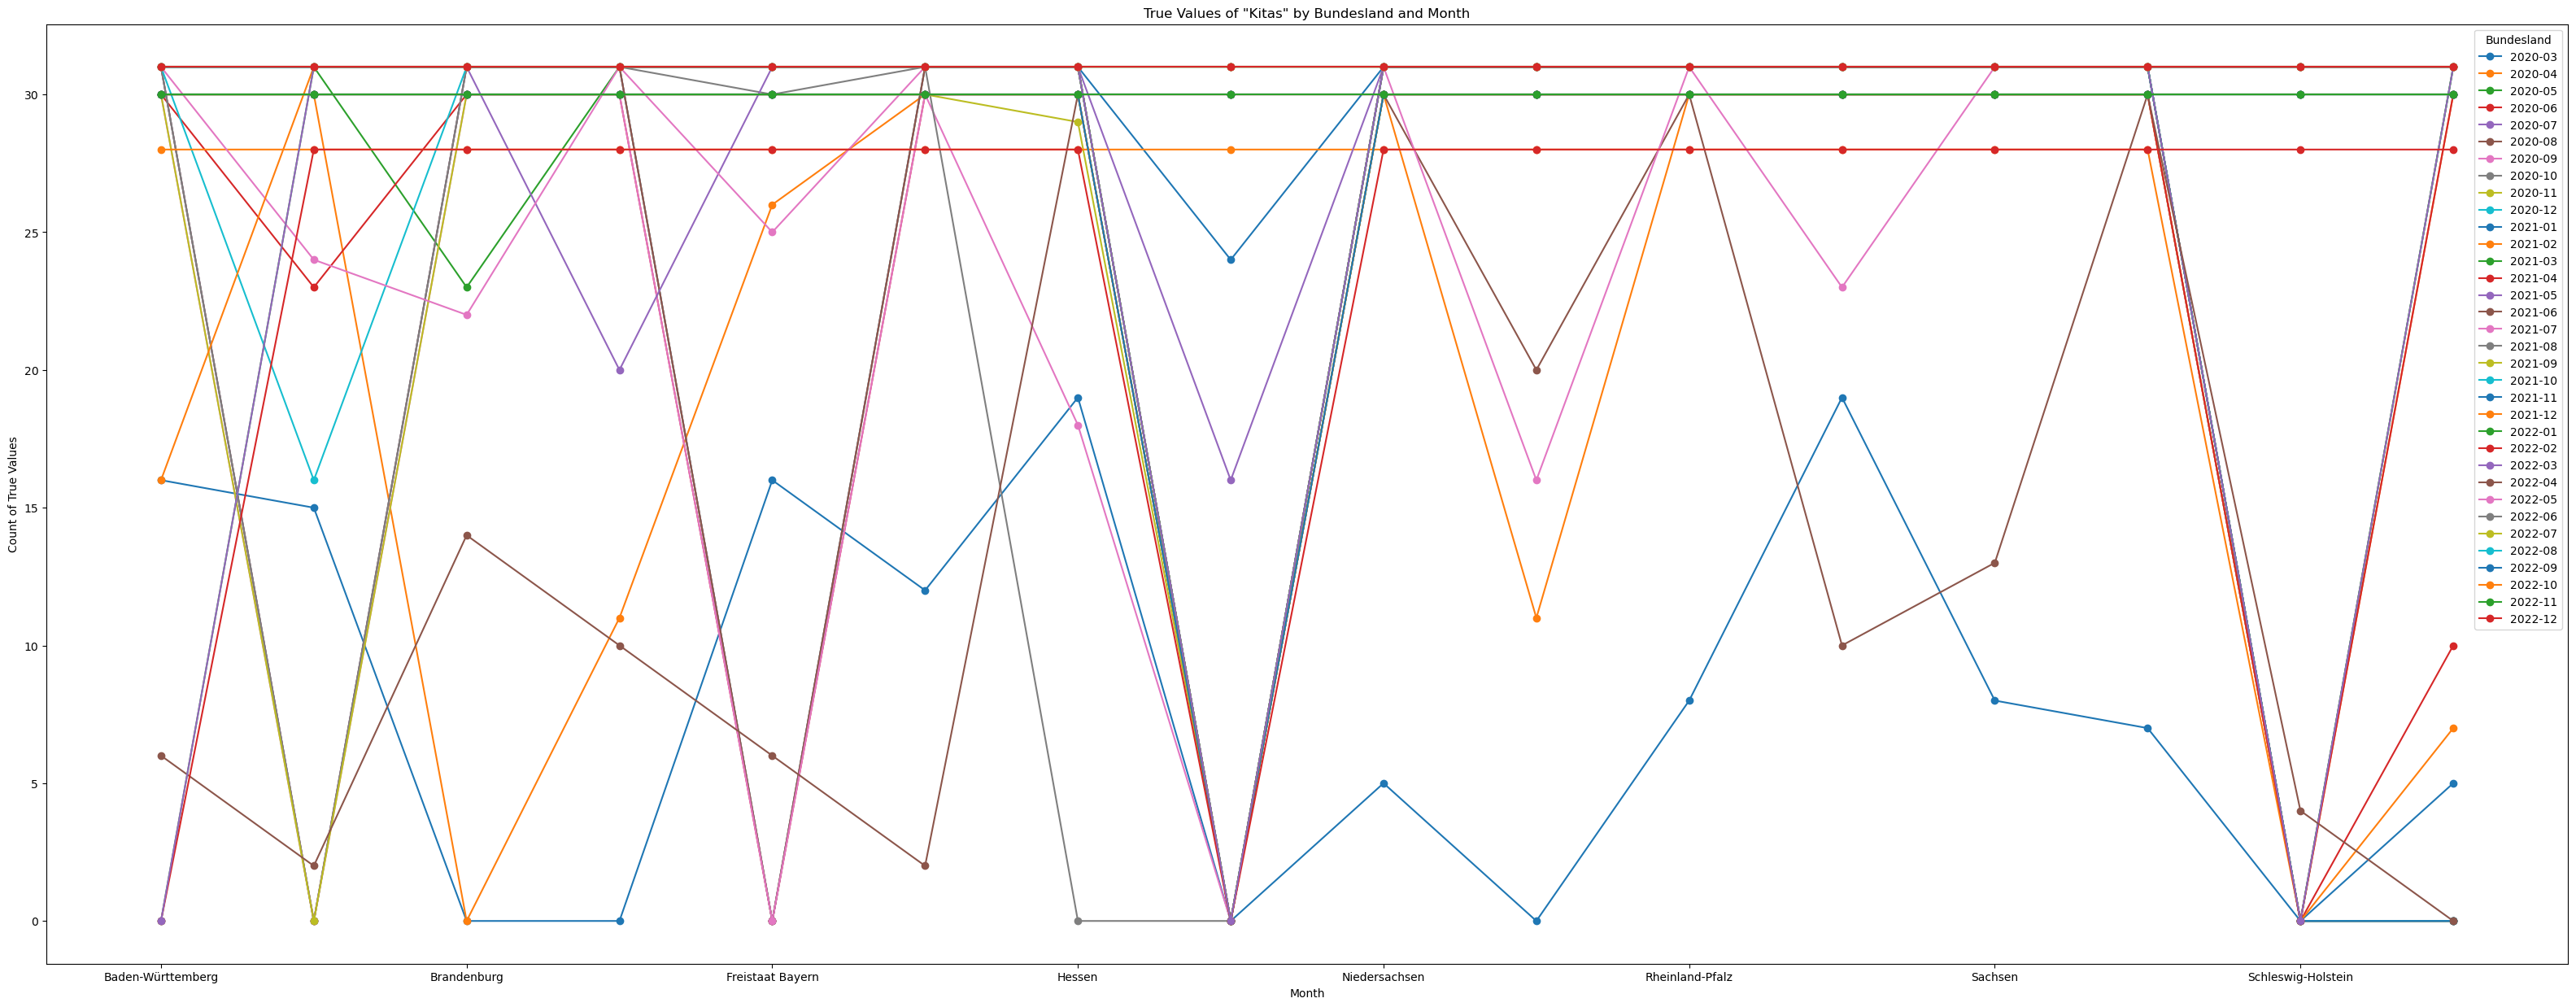

In [62]:
# Convert 'Datum' column to datetime format
couteractions_test['Datum'] = pd.to_datetime(couteractions_test['Datum'], format='%d.%m.%Y')

# Extract month and year, create 'month_year' column
couteractions_test['month_year'] = couteractions_test['Datum'].dt.to_period('M')

# Filter for true values of "Kitas" column only
df_kitas = couteractions_test[couteractions_test['Kitas'] == True]

# Group by 'Bundesland' and 'month_year' and calculate count of true values
grouped_df = df_kitas.groupby(['Bundesland', 'month_year']).size().unstack(fill_value=0)

# Create a line plot for each Bundesland
grouped_df.plot(kind='line', figsize=(40, 15), marker='o')

plt.title('True Values of "Kitas" by Bundesland and Month')
plt.xlabel('Month')
plt.ylabel('Count of True Values')
plt.legend(title='Bundesland')
plt.show()

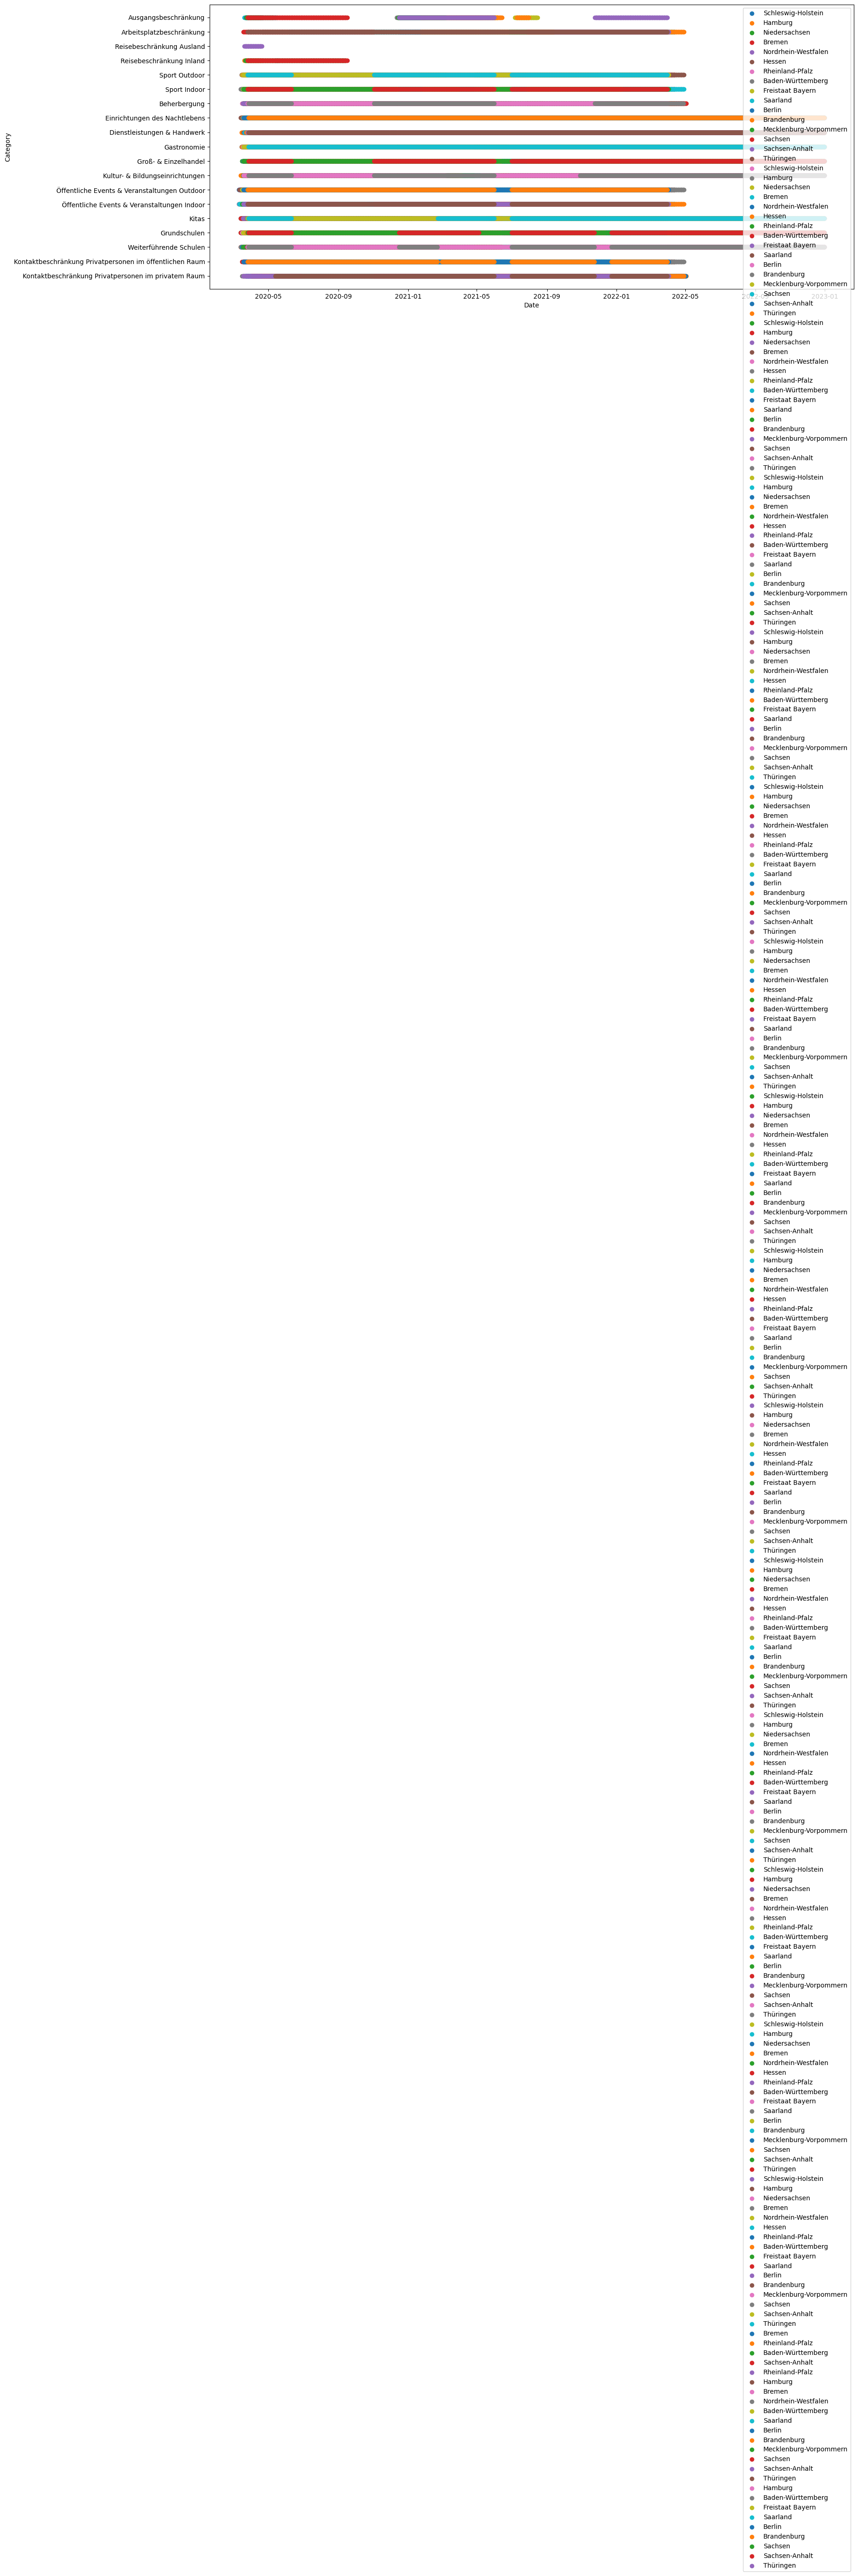

In [63]:
# Set the figure size
plt.figure(figsize=(18, 8))

# Loop through each column in the dataframe
for column in couteractions_test.columns:
    if column != 'Bundesland':
        # Filter for true values of the column
        true_values = couteractions_test[couteractions_test[column] == True]
        
        # Plot the scatter for each Bundesland
        for bundesland in true_values['Bundesland'].unique():
            data = true_values[true_values['Bundesland'] == bundesland]
            plt.scatter(data['Datum'], [column] * len(data), label=bundesland)

# Set the x-axis label and y-axis label
plt.xlabel('Date')
plt.ylabel('Category')

# Set the legend
plt.legend()

# Show the plot
plt.show()

In [64]:
couteractions_test

Bundesland      Datum  \
0      Schleswig-Holstein 2020-03-01   
1      Schleswig-Holstein 2020-03-02   
2      Schleswig-Holstein 2020-03-03   
3      Schleswig-Holstein 2020-03-04   
4      Schleswig-Holstein 2020-03-05   
...                   ...        ...   
16571           Thüringen 2022-12-27   
16572           Thüringen 2022-12-28   
16573           Thüringen 2022-12-29   
16574           Thüringen 2022-12-30   
16575           Thüringen 2022-12-31   

       Kontaktbeschränkung Privatpersonen im privatem Raum  \
0                                                  False     
1                                                  False     
2                                                  False     
3                                                  False     
4                                                  False     
...                                                  ...     
16571                                              False     
16572                                              False     
16573                                              False     
16574                                              False     
16575                                              False     

       Kontaktbeschränkung Privatpersonen im öffentlichen Raum  \
0                                                  False         
1                                                  False         
2                                                  False         
3                                                  False         
4                                                  False         
...                                                  ...         
16571                                              False         
16572                                              False         
16573                                              False         
16574                                              False         
16575                                              False         

       Weiterführende Schulen  Grundschulen  Kitas  \
0                       False         False  False   
1                       False         False  False   
2                       False         False  False   
3                       False         False  False   
4                       False         False  False   
...                       ...           ...    ...   
16571                    True          True   True   
16572                    True          True   True   
16573                    True          True   True   
16574                    True          True   True   
16575                    True          True   True   

       Öffentliche Events & Veranstaltungen Indoor  \
0                                            False   
1                                            False   
2                                            False   
3                                            False   
4                                            False   
...                                            ...   
16571                                        False   
16572                                        False   
16573                                        False   
16574                                        False   
16575                                        False   

       Öffentliche Events & Veranstaltungen Outdoor  \
0                                             False   
1                                             False   
2                                             False   
3                                             False   
4                                             False   
...                                             ...   
16571                                         False   
16572                                         False   
16573                                         False   
16574                                         False   
16575                                         False   

       Kultur- & Bildungseinrichtunge

In [65]:
couteractions

Bundesland       Datum  \
0      Schleswig-Holstein  2020-03-01   
1      Schleswig-Holstein  2020-03-02   
2      Schleswig-Holstein  2020-03-03   
3      Schleswig-Holstein  2020-03-04   
4      Schleswig-Holstein  2020-03-05   
...                   ...         ...   
16571           Thüringen  2022-12-27   
16572           Thüringen  2022-12-28   
16573           Thüringen  2022-12-29   
16574           Thüringen  2022-12-30   
16575           Thüringen  2022-12-31   

       Kontaktbeschränkung Privatpersonen im privatem Raum  \
0                                                  False     
1                                                  False     
2                                                  False     
3                                                  False     
4                                                  False     
...                                                  ...     
16571                                              False     
16572                                              False     
16573                                              False     
16574                                              False     
16575                                              False     

       Kontaktbeschränkung Privatpersonen im öffentlichen Raum  \
0                                                  False         
1                                                  False         
2                                                  False         
3                                                  False         
4                                                  False         
...                                                  ...         
16571                                              False         
16572                                              False         
16573                                              False         
16574                                              False         
16575                                              False         

       Weiterführende Schulen  Grundschulen  Kitas  \
0                       False         False  False   
1                       False         False  False   
2                       False         False  False   
3                       False         False  False   
4                       False         False  False   
...                       ...           ...    ...   
16571                    True          True   True   
16572                    True          True   True   
16573                    True          True   True   
16574                    True          True   True   
16575                    True          True   True   

       Öffentliche Events & Veranstaltungen Indoor  \
0                                            False   
1                                            False   
2                                            False   
3                                            False   
4                                            False   
...                                            ...   
16571                                        False   
16572                                        False   
16573                                        False   
16574                                        False   
16575                                        False   

       Öffentliche Events & Veranstaltungen Outdoor  \
0                                             False   
1                                             False   
2                                             False   
3                                             False   
4                                             False   
...                                             ...   
16571                                         False   
16572                                         False   
16573                                         False   
16574                                         False   
16575                                         False   

       Kultur- & Bildungs

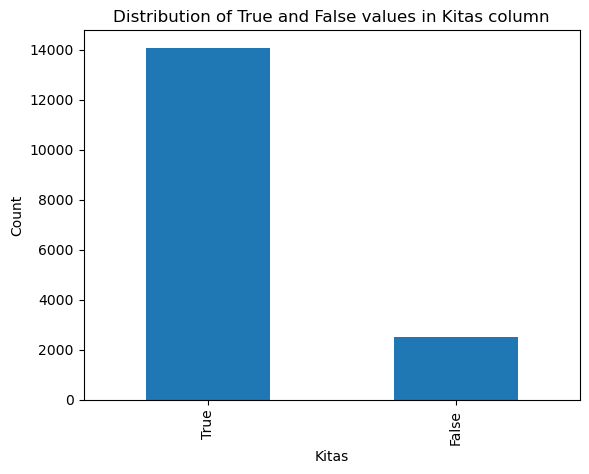

In [67]:
value_counts = couteractions_test['Kitas'].value_counts()
value_counts.plot(kind='bar')
plt.xlabel('Kitas')
plt.ylabel('Count')
plt.title('Distribution of True and False values in Kitas column')
plt.show()

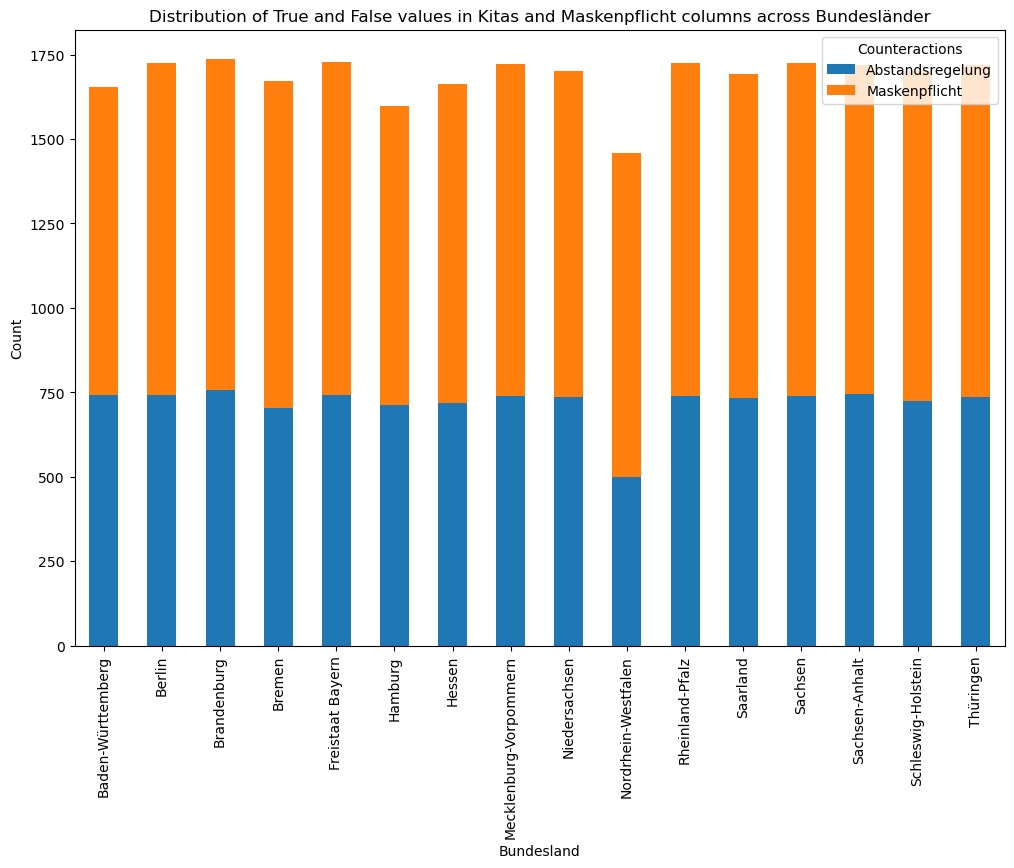

In [133]:
grouped_data = couteractions_test.groupby('Bundesland')[['Abstandsregelung', 'Maskenpflicht']].apply(lambda x: x.astype(bool).sum())

# Plot the stacked bar graph
grouped_data.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Bundesland')
plt.ylabel('Count')
plt.title('Distribution of True and False values in Kitas and Maskenpflicht columns across Bundesländer')
plt.legend(title='Counteractions', loc='upper right')
plt.show()

C:\ProgramData\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:512: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



<Figure size 1200x800 with 0 Axes>

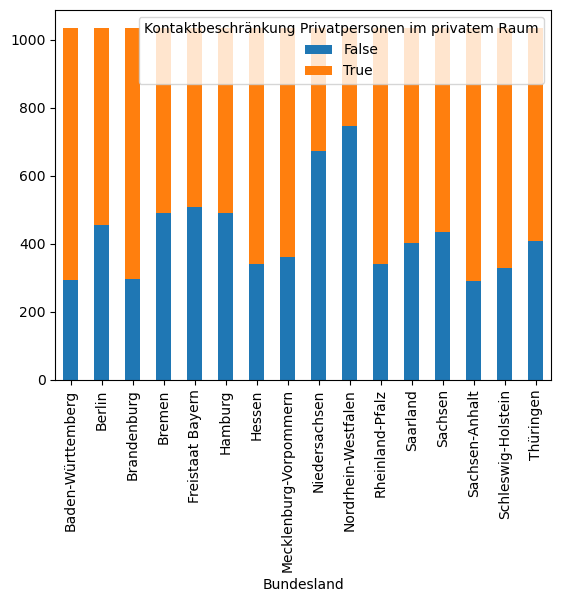

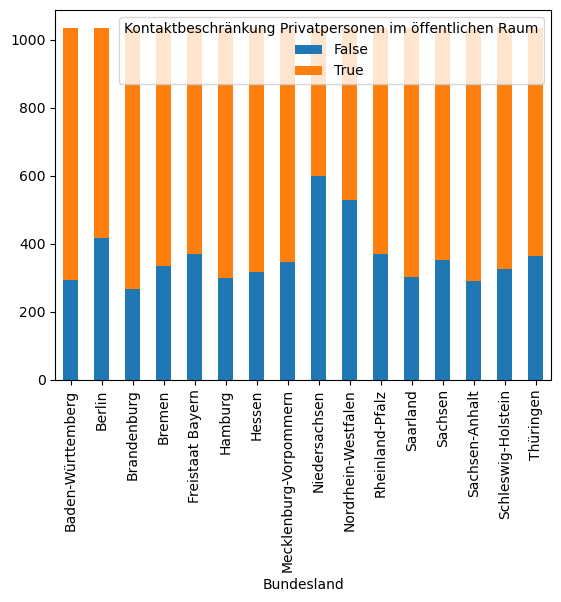

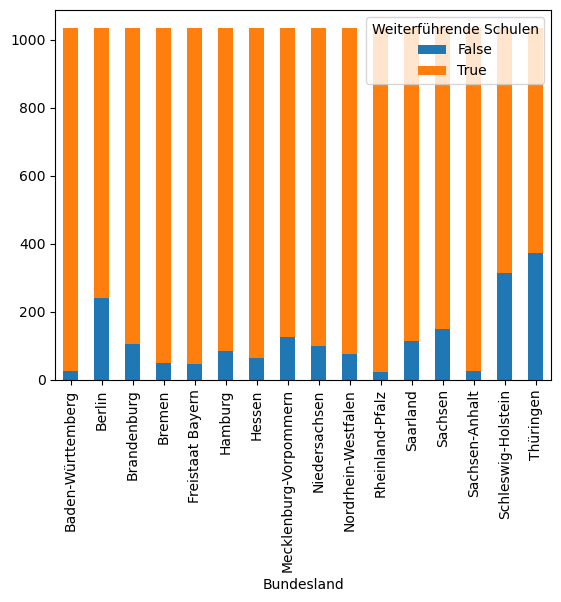

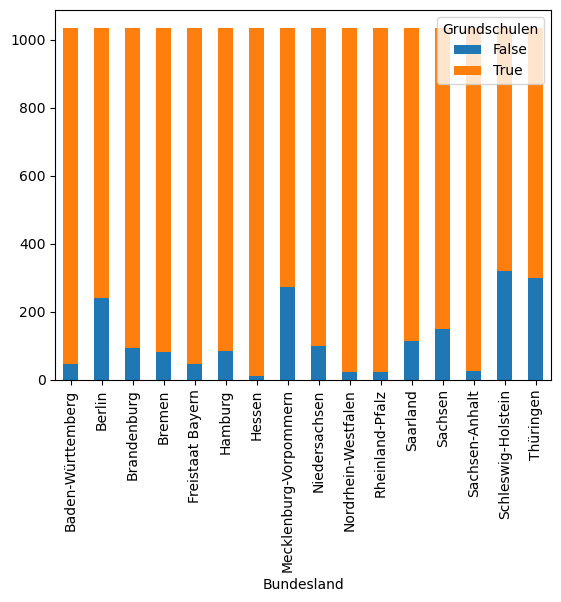

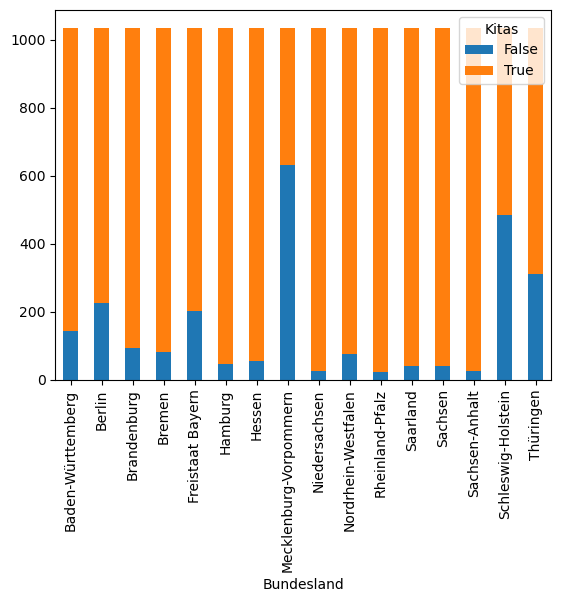

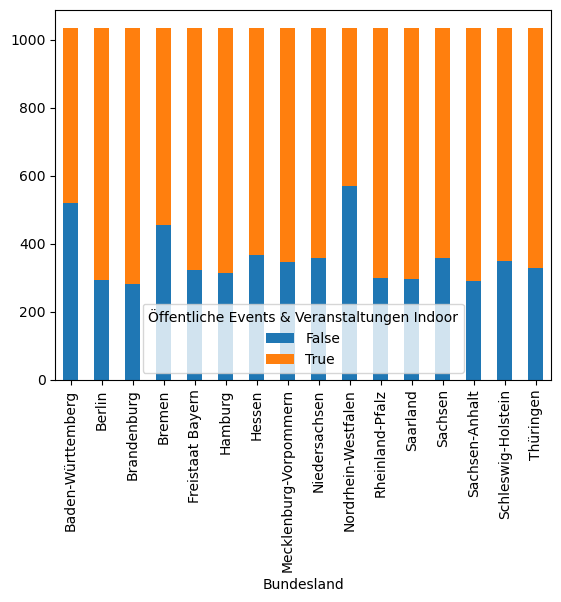

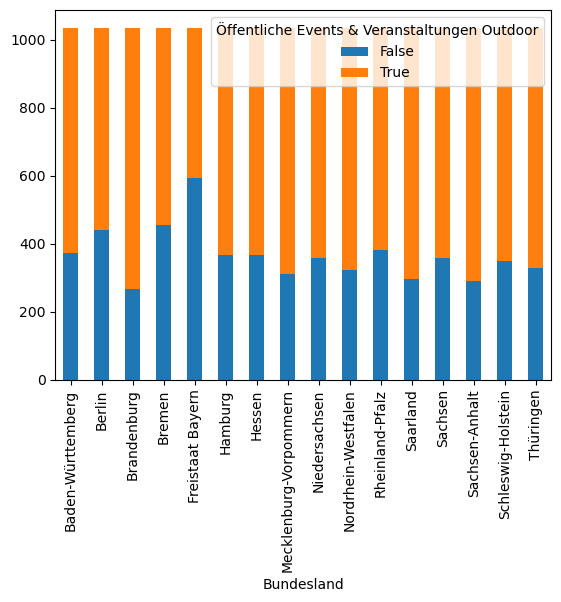

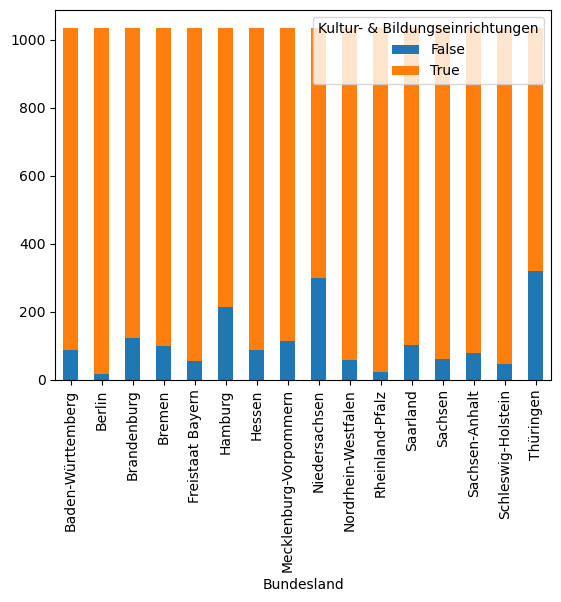

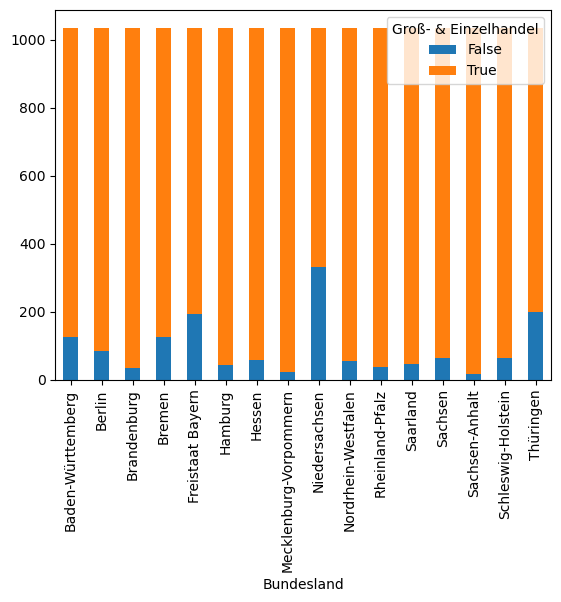

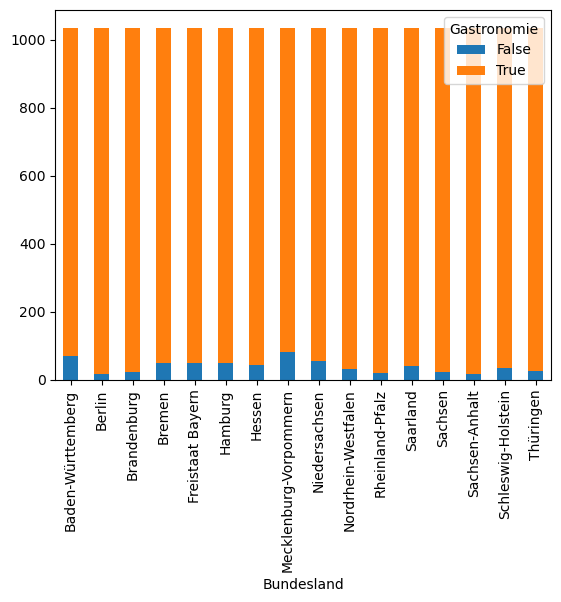

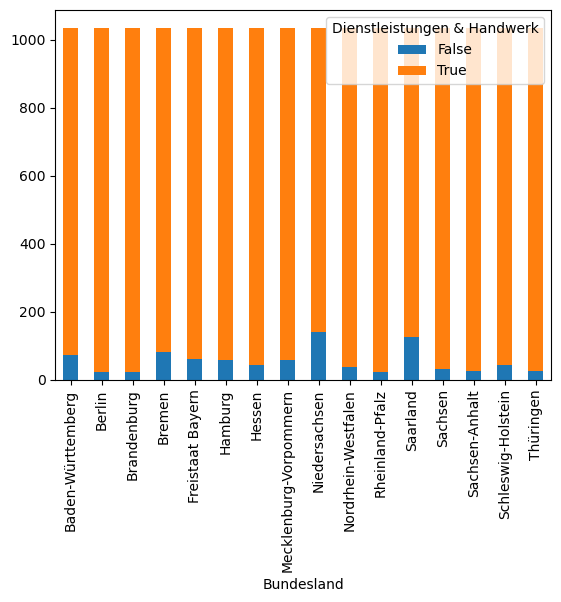

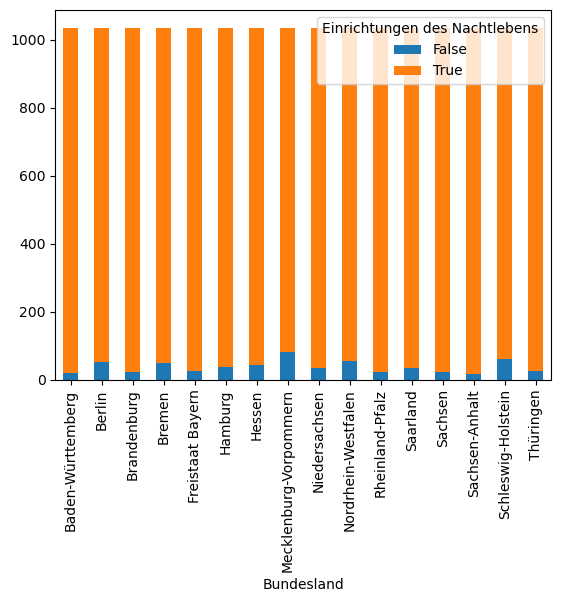

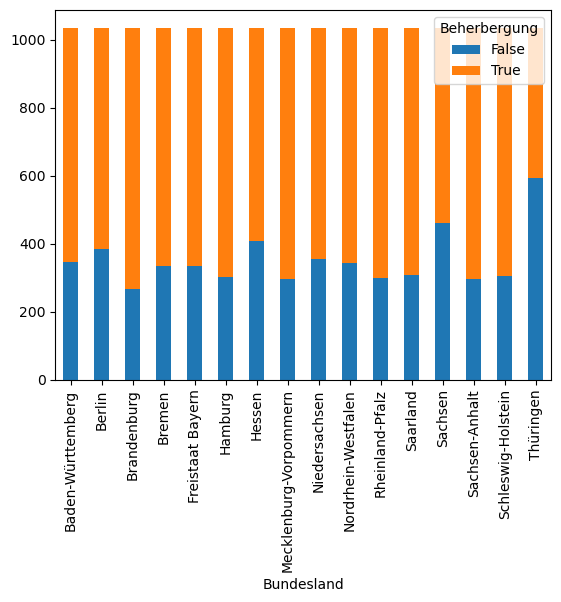

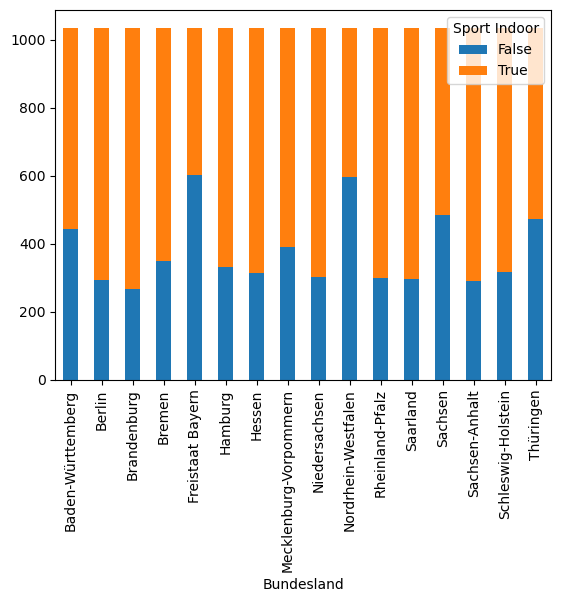

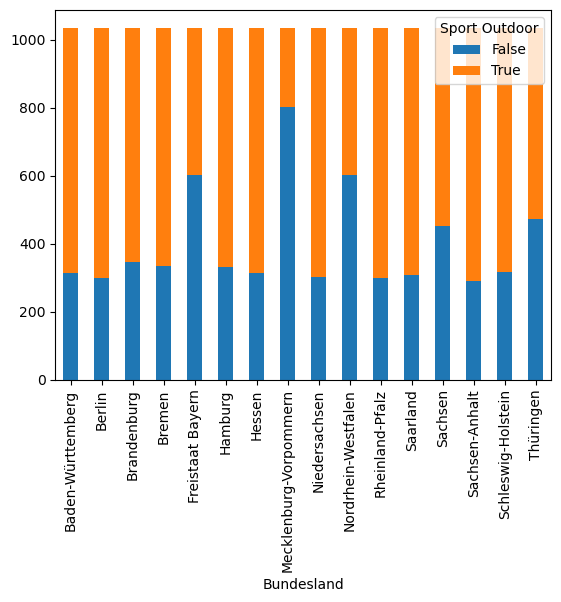

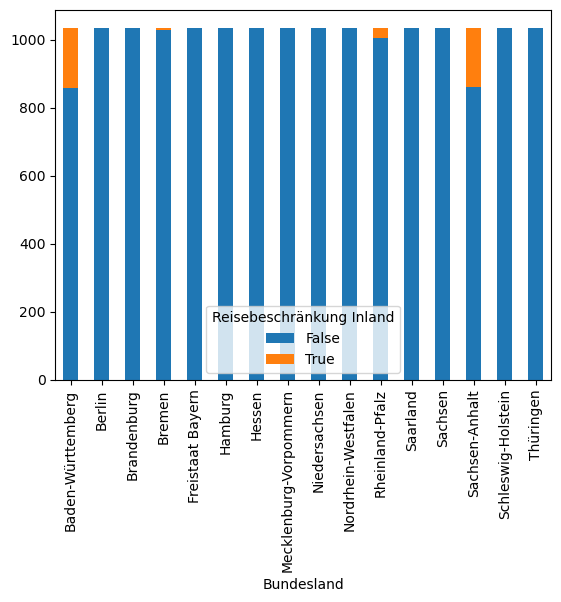

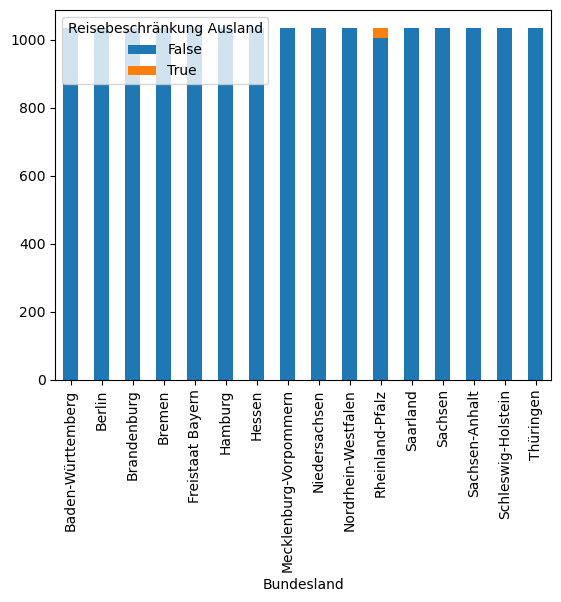

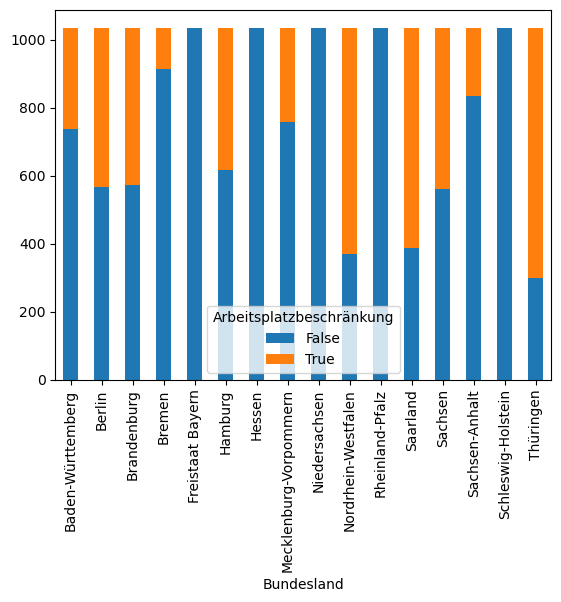

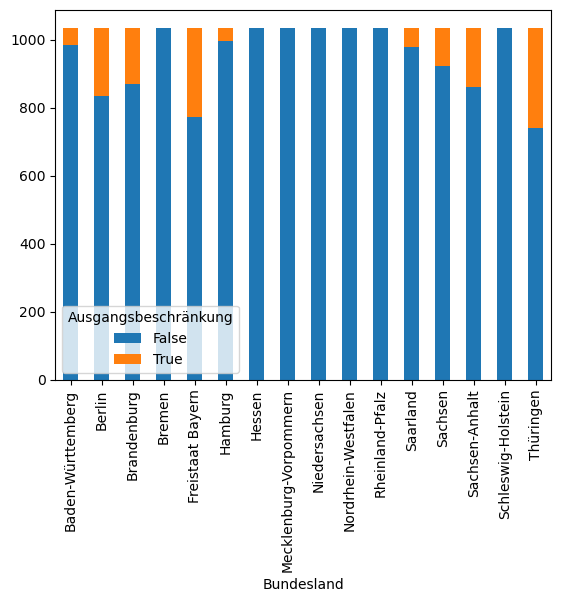

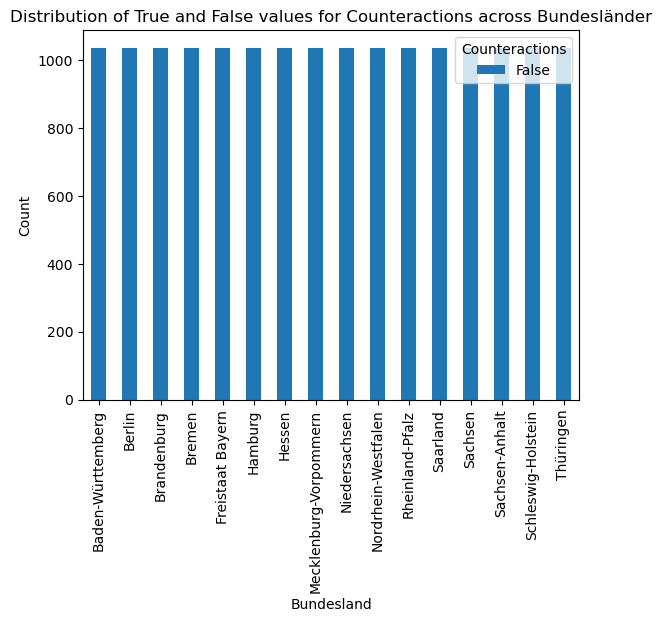

In [71]:
import matplotlib.pyplot as plt

# Select the counteraction columns
counteraction_columns = ['Kontaktbeschränkung Privatpersonen im privatem Raum',
                         'Kontaktbeschränkung Privatpersonen im öffentlichen Raum',
                         'Weiterführende Schulen',
                         'Grundschulen',
                         'Kitas',
                         'Öffentliche Events & Veranstaltungen Indoor',
                         'Öffentliche Events & Veranstaltungen Outdoor',
                         'Kultur- & Bildungseinrichtungen',
                         'Groß- & Einzelhandel',
                         'Gastronomie',
                         'Dienstleistungen & Handwerk',
                         'Einrichtungen des Nachtlebens',
                         'Beherbergung',
                         'Sport Indoor',
                         'Sport Outdoor',
                         'Reisebeschränkung Inland',
                         'Reisebeschränkung Ausland',
                         'Arbeitsplatzbeschränkung',
                         'Ausgangsbeschränkung',
                         'Kapazitätsbeschränkung im öffentlichen Verkehr']

# Create a bar plot for each counteraction column
plt.figure(figsize=(12, 8))
for column in counteraction_columns:
    # Group the data by 'Bundesland' and calculate the count of True and False values for the current column
    grouped_data = couteractions_test.groupby('Bundesland')[column].value_counts().unstack().fillna(0)
    # Plot the stacked bar for the current column
    grouped_data.plot(kind='bar', stacked=True, label=column)

plt.xlabel('Bundesland')
plt.ylabel('Count')
plt.title('Distribution of True and False values for Counteractions across Bundesländer')
plt.legend(title='Counteractions', loc='upper right')
plt.show()


<Figure size 1200x800 with 0 Axes>

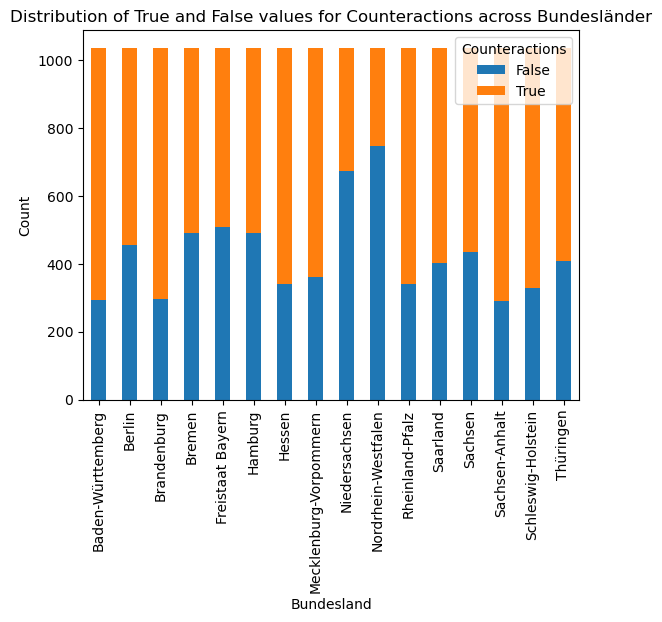

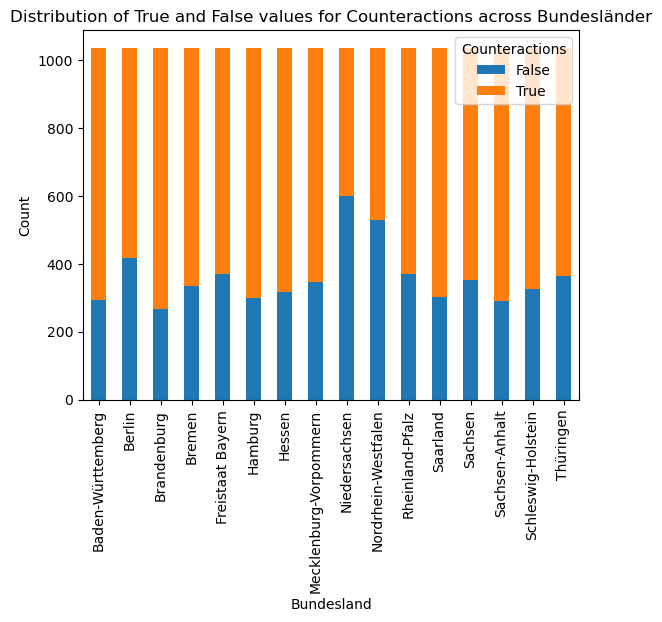

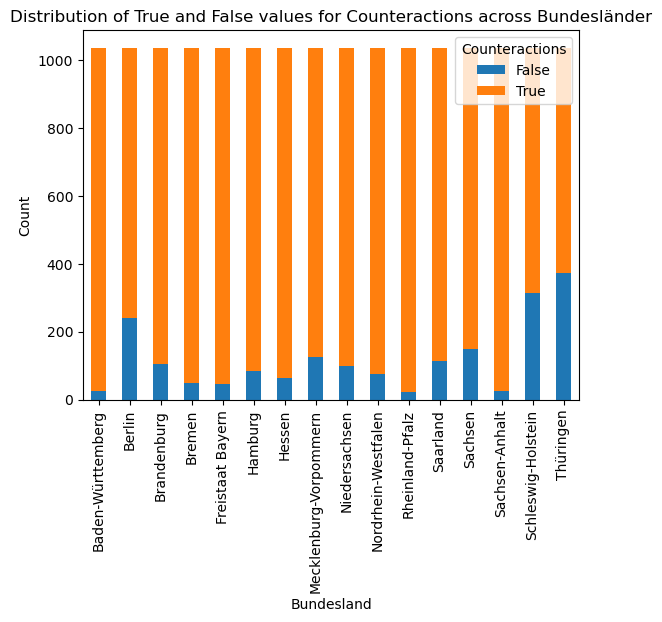

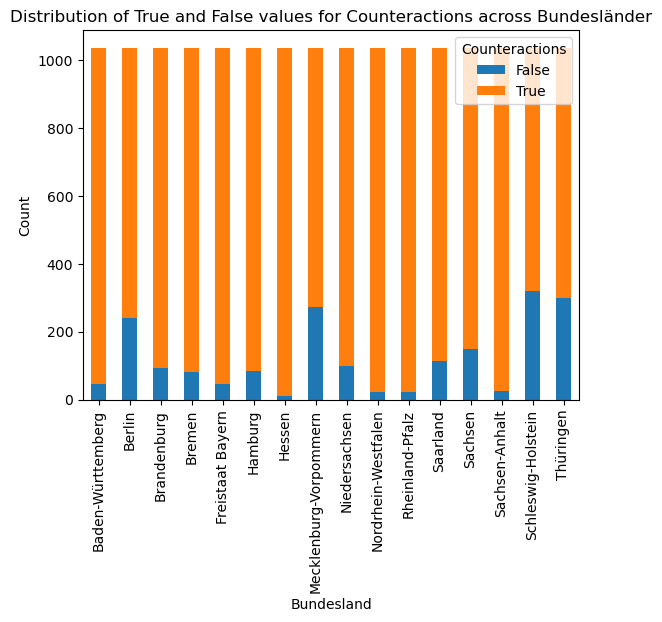

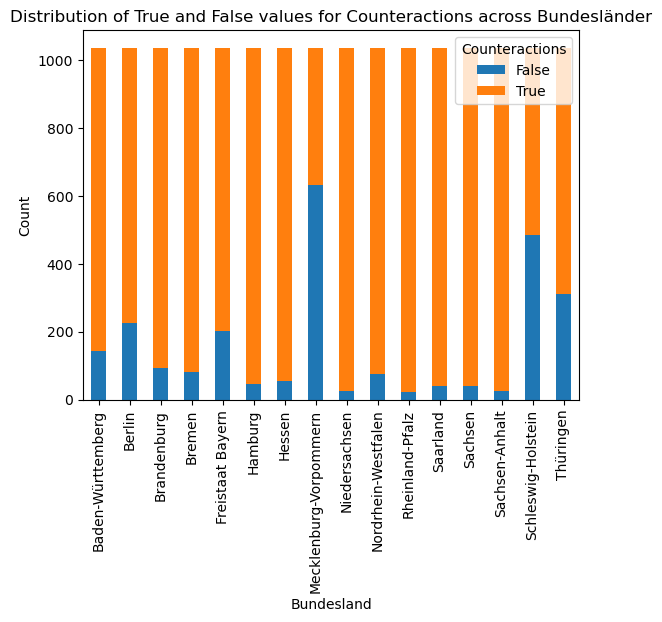

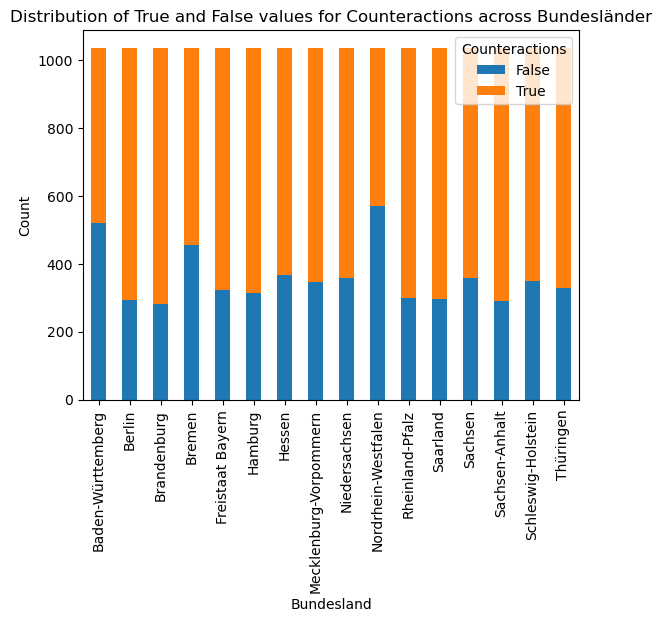

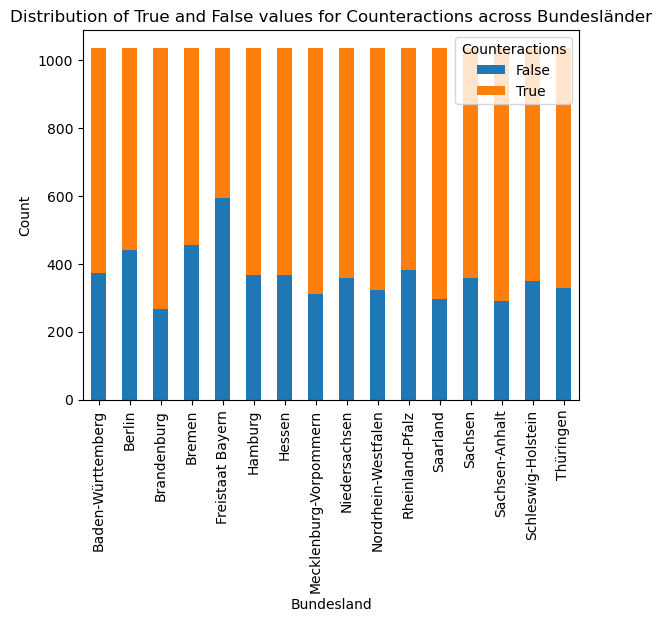

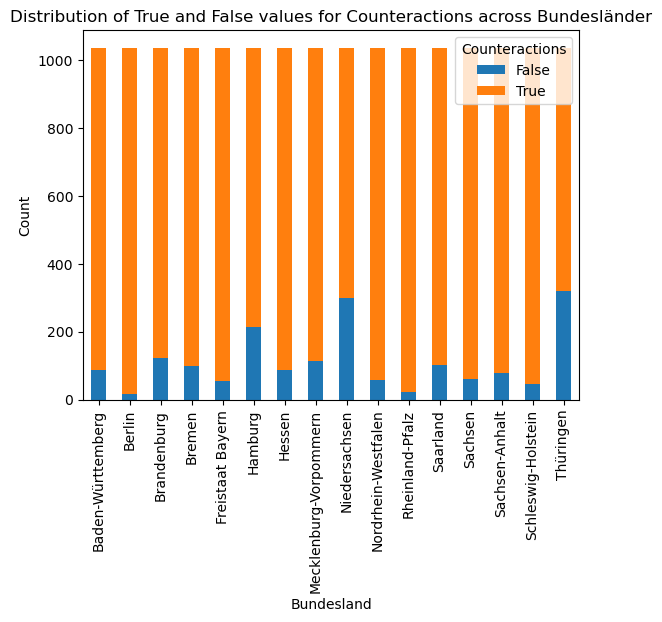

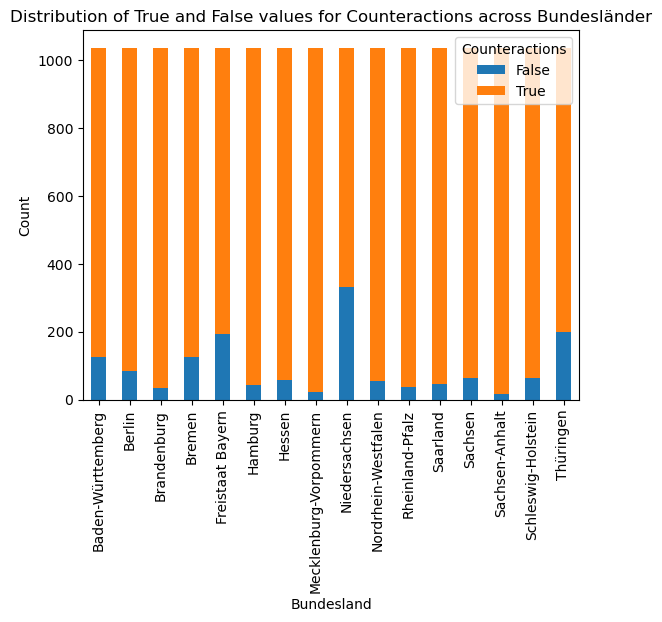

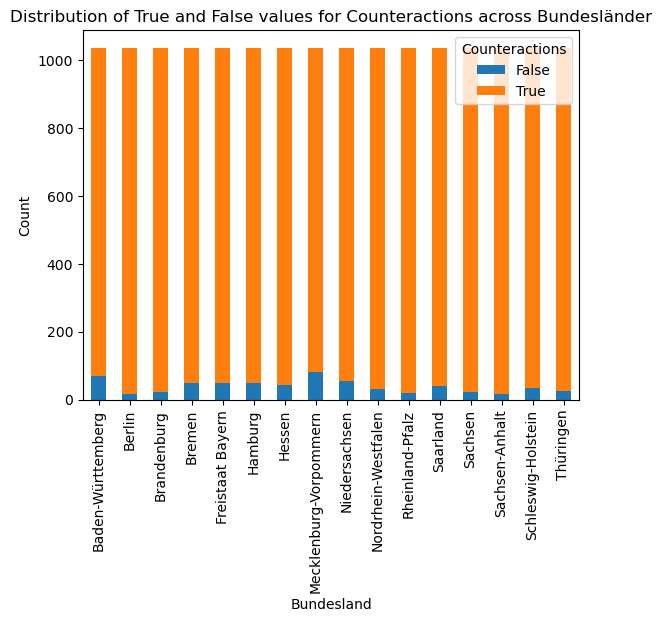

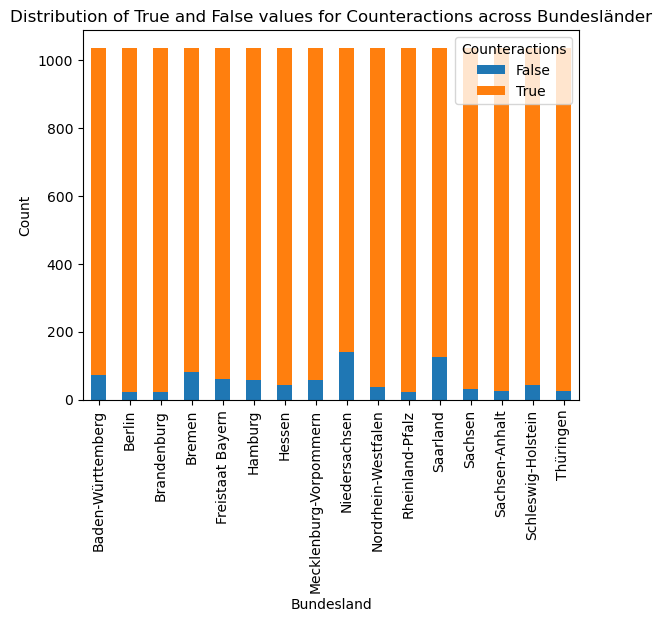

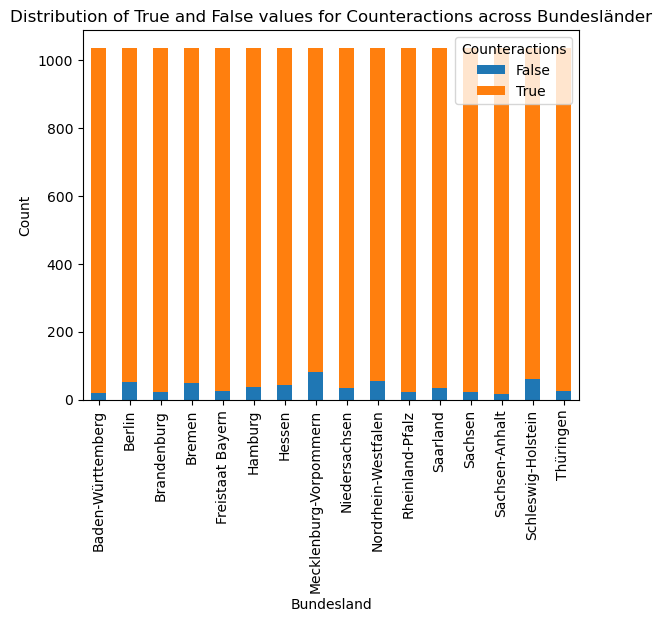

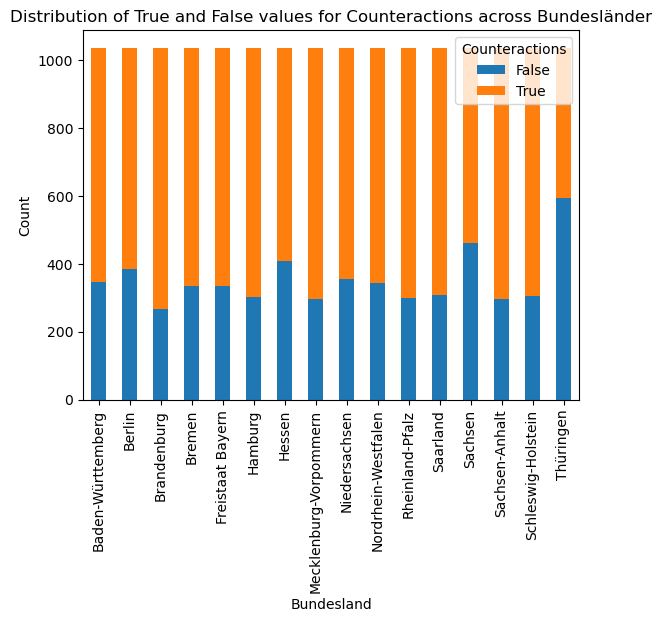

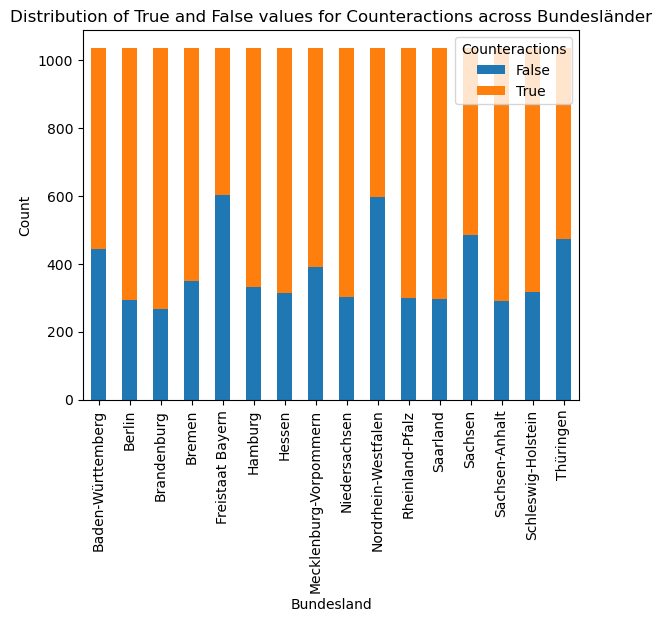

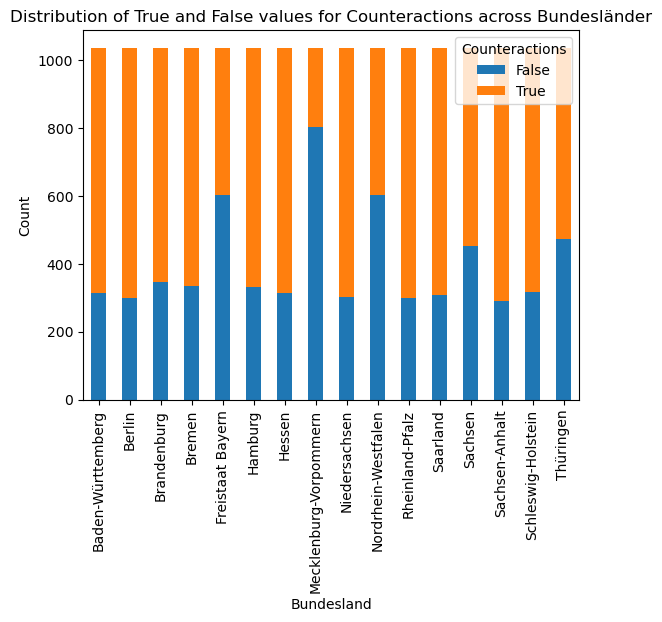

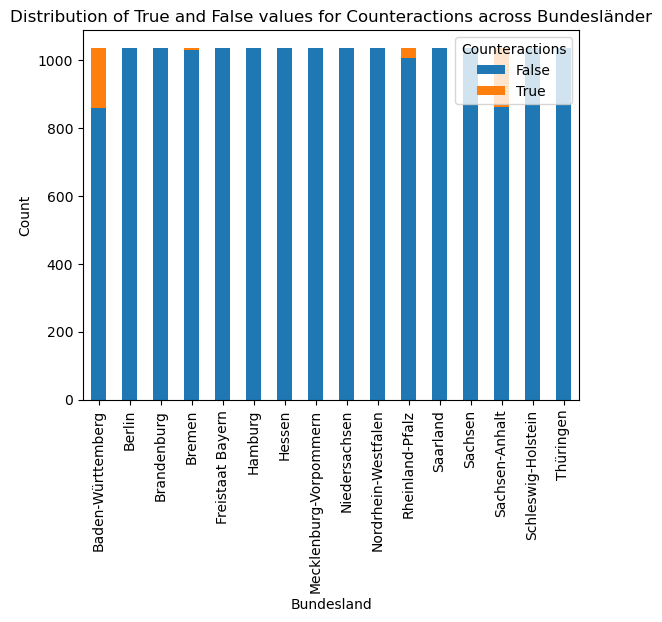

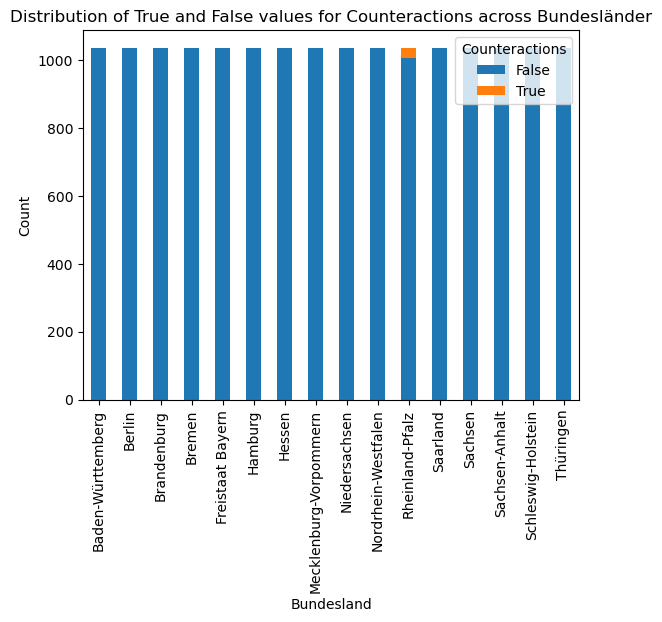

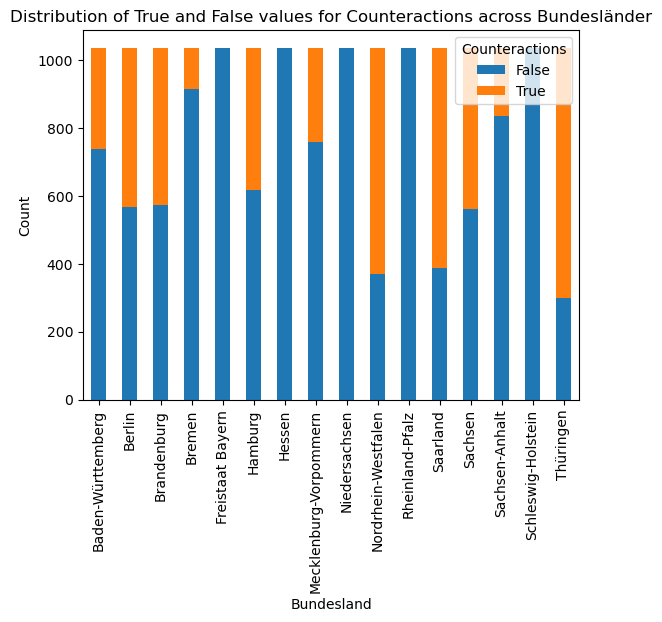

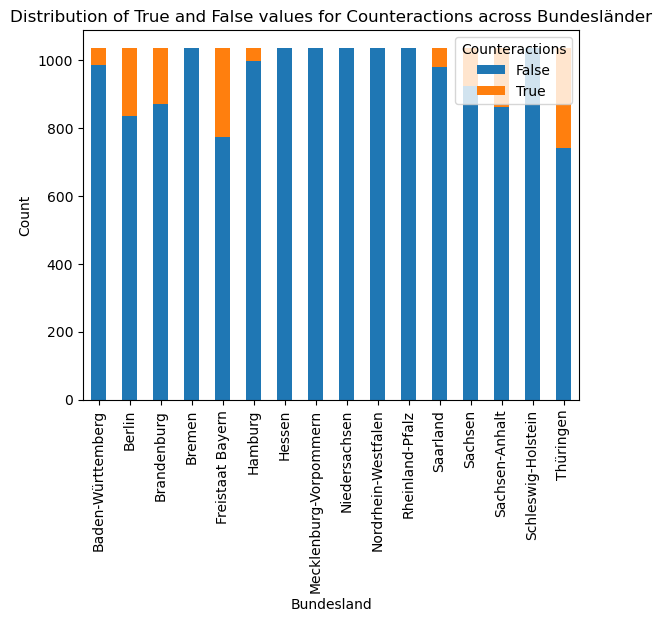

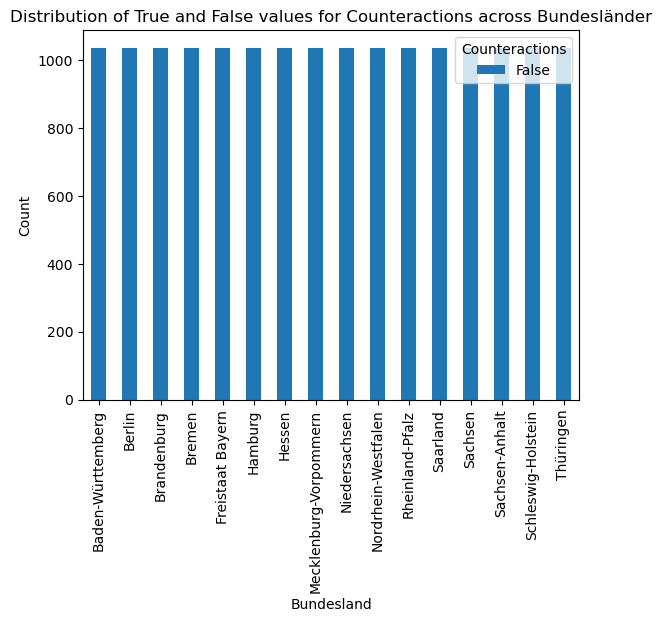

In [72]:
import matplotlib.pyplot as plt

# Select the counteraction columns
counteraction_columns = ['Kontaktbeschränkung Privatpersonen im privatem Raum',
                         'Kontaktbeschränkung Privatpersonen im öffentlichen Raum',
                         'Weiterführende Schulen',
                         'Grundschulen',
                         'Kitas',
                         'Öffentliche Events & Veranstaltungen Indoor',
                         'Öffentliche Events & Veranstaltungen Outdoor',
                         'Kultur- & Bildungseinrichtungen',
                         'Groß- & Einzelhandel',
                         'Gastronomie',
                         'Dienstleistungen & Handwerk',
                         'Einrichtungen des Nachtlebens',
                         'Beherbergung',
                         'Sport Indoor',
                         'Sport Outdoor',
                         'Reisebeschränkung Inland',
                         'Reisebeschränkung Ausland',
                         'Arbeitsplatzbeschränkung',
                         'Ausgangsbeschränkung',
                         'Kapazitätsbeschränkung im öffentlichen Verkehr']

# Create a bar plot for each counteraction column
plt.figure(figsize=(12, 8))
for column in counteraction_columns:
    # Group the data by 'Bundesland' and calculate the count of True and False values for the current column
    grouped_data = couteractions_test.groupby('Bundesland')[column].value_counts().unstack().fillna(0)
    # Plot the stacked bar for the current column
    grouped_data.plot(kind='bar', stacked=True, label=column)

    plt.xlabel('Bundesland')
    plt.ylabel('Count')
    plt.title('Distribution of True and False values for Counteractions across Bundesländer')
    plt.legend(title='Counteractions', loc='upper right')
    plt.show()
    plt.close()

<Figure size 1200x800 with 0 Axes>

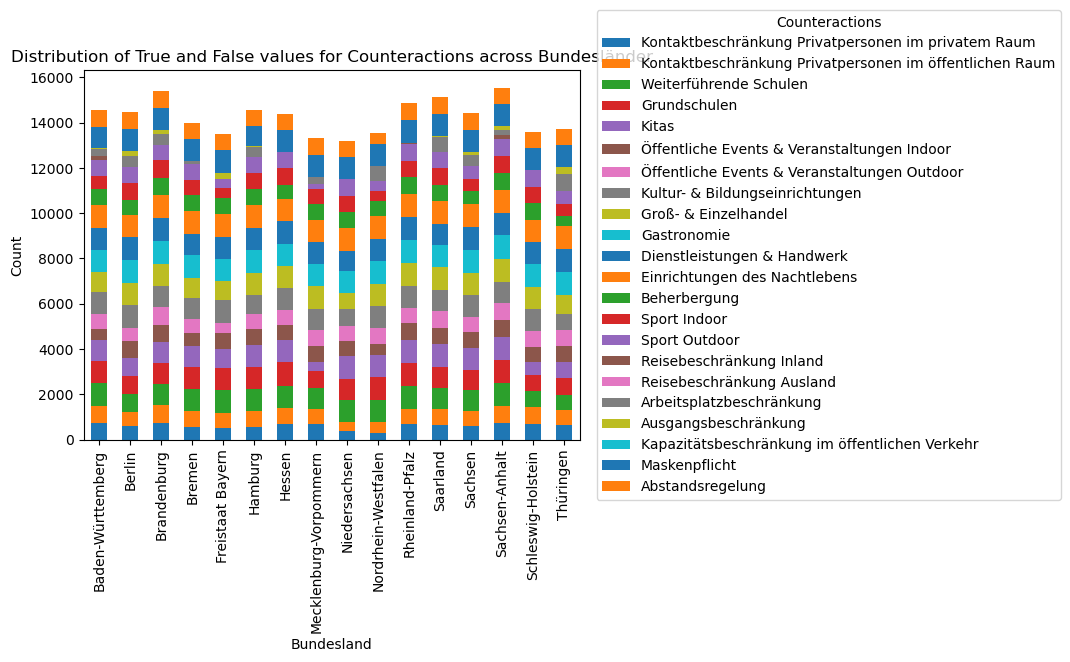

In [98]:


# Select the counteraction columns
counteraction_columns = [
    'Kontaktbeschränkung Privatpersonen im privatem Raum',
                         'Kontaktbeschränkung Privatpersonen im öffentlichen Raum',
                         'Weiterführende Schulen',
                         'Grundschulen',
                         'Kitas',
                         'Öffentliche Events & Veranstaltungen Indoor',
                         'Öffentliche Events & Veranstaltungen Outdoor',
                         'Kultur- & Bildungseinrichtungen',
                         'Groß- & Einzelhandel',
                         'Gastronomie',
                         'Dienstleistungen & Handwerk',
                         'Einrichtungen des Nachtlebens',
                         'Beherbergung',
                         'Sport Indoor',
                         'Sport Outdoor',
                         'Reisebeschränkung Inland',
                         'Reisebeschränkung Ausland',
                         'Arbeitsplatzbeschränkung',
                         'Ausgangsbeschränkung',
                         'Kapazitätsbeschränkung im öffentlichen Verkehr',
                        'Maskenpflicht',
                        'Abstandsregelung']

# Create a bar plot for all counteraction columns
plt.figure(figsize=(12, 8))

# Group the data by 'Bundesland' and calculate the count of True and False values for each counteraction column
grouped_data = couteractions_test.groupby('Bundesland')[counteraction_columns].sum()

# Plot the stacked bar for all counteraction columns
grouped_data.plot(kind='bar', stacked=True)

plt.xlabel('Bundesland')
plt.ylabel('Count')
plt.title('Distribution of True and False values for Counteractions across Bundesländer')

# Define the position of the legend
legend_position = (1.02, 0.5)  # Adjust the values as needed

plt.legend(title='Counteractions', bbox_to_anchor=legend_position, loc='center left')
plt.show()

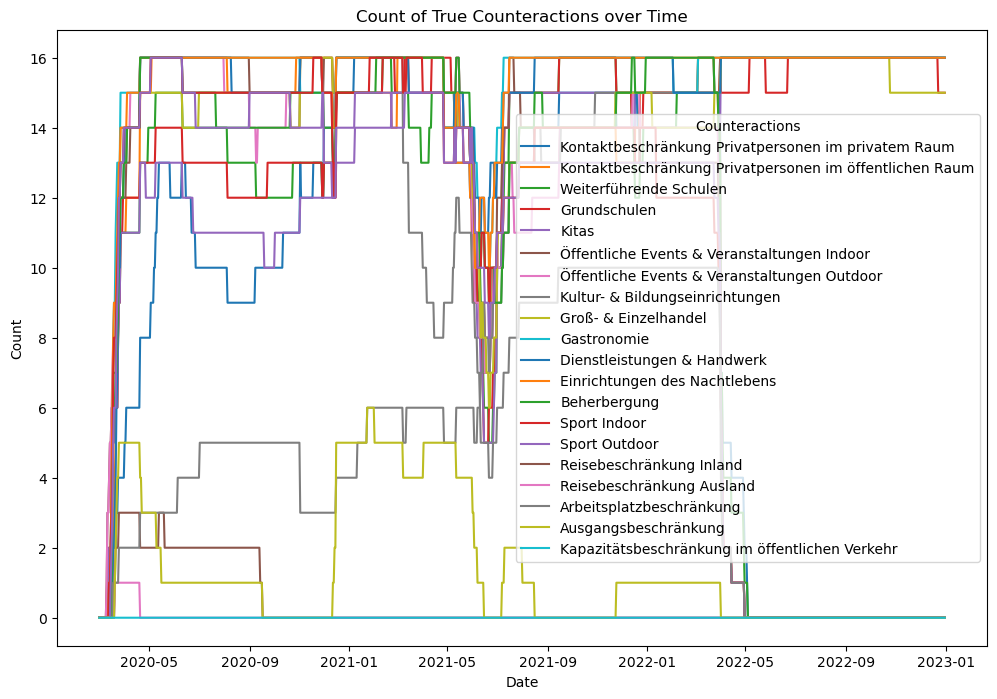

In [99]:
counteraction_columns = ['Kontaktbeschränkung Privatpersonen im privatem Raum',
                         'Kontaktbeschränkung Privatpersonen im öffentlichen Raum',
                         'Weiterführende Schulen',
                         'Grundschulen',
                         'Kitas',
                         'Öffentliche Events & Veranstaltungen Indoor',
                         'Öffentliche Events & Veranstaltungen Outdoor',
                         'Kultur- & Bildungseinrichtungen',
                         'Groß- & Einzelhandel',
                         'Gastronomie',
                         'Dienstleistungen & Handwerk',
                         'Einrichtungen des Nachtlebens',
                         'Beherbergung',
                         'Sport Indoor',
                         'Sport Outdoor',
                         'Reisebeschränkung Inland',
                         'Reisebeschränkung Ausland',
                         'Arbeitsplatzbeschränkung',
                         'Ausgangsbeschränkung',
                         'Kapazitätsbeschränkung im öffentlichen Verkehr']

# Group the data by 'Datum' and calculate the count of True and False values for each counteraction column
grouped_data = couteractions_test.groupby('Datum')[counteraction_columns].sum()

# Plot the line graph for each counteraction column
plt.figure(figsize=(12, 8))
for column in grouped_data.columns:
    plt.plot(grouped_data.index, grouped_data[column], label=column)

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Count of True Counteractions over Time')
plt.legend(title='Counteractions')
plt.show()

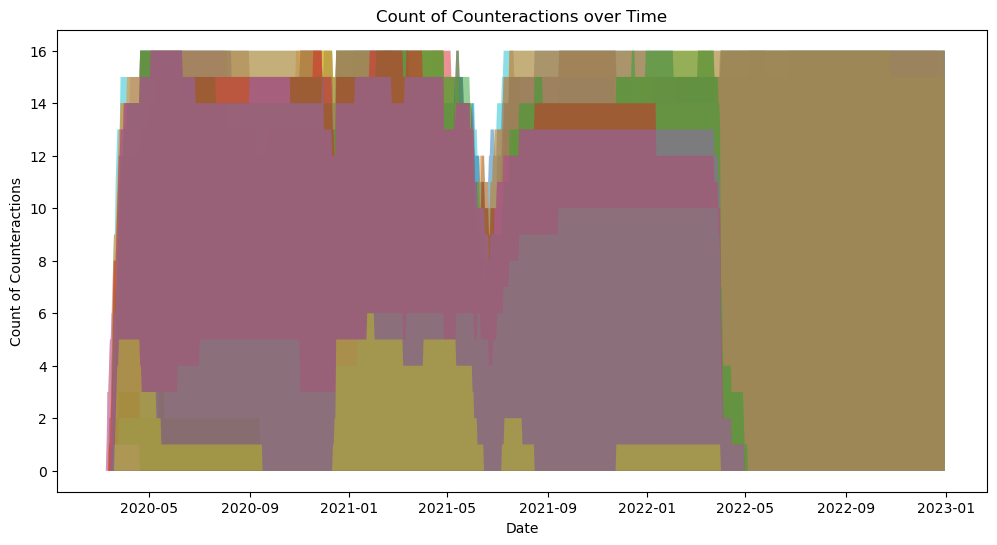

In [101]:
# Select only the columns with counteraction values
counteraction_columns = ['Kontaktbeschränkung Privatpersonen im privatem Raum',
                         'Kontaktbeschränkung Privatpersonen im öffentlichen Raum',
                         'Weiterführende Schulen',
                         'Grundschulen',
                         'Kitas',
                         'Öffentliche Events & Veranstaltungen Indoor',
                         'Öffentliche Events & Veranstaltungen Outdoor',
                         'Kultur- & Bildungseinrichtungen',
                         'Groß- & Einzelhandel',
                         'Gastronomie',
                         'Dienstleistungen & Handwerk',
                         'Einrichtungen des Nachtlebens',
                         'Beherbergung',
                         'Sport Indoor',
                         'Sport Outdoor',
                         'Reisebeschränkung Inland',
                         'Reisebeschränkung Ausland',
                         'Arbeitsplatzbeschränkung',
                         'Ausgangsbeschränkung',
                         'Kapazitätsbeschränkung im öffentlichen Verkehr']

# Group the data by date and calculate the sum of counteractions
grouped_df = couteractions_test.groupby('Datum')[counteraction_columns].sum()

# Create the area chart
plt.figure(figsize=(12, 6))
for column in counteraction_columns:
    plt.fill_between(grouped_df.index, grouped_df[column], alpha=0.5)

# Set the x-axis label and title
plt.xlabel('Date')
plt.ylabel('Count of Counteractions')
plt.title('Count of Counteractions over Time')

# Display the chart
plt.show()

In [103]:
countermeasure_columns = couteractions_test.columns[3:]

# Create an empty dictionary to store the results
result = {}

# Iterate over the countermeasure columns
for column in countermeasure_columns:
    # Group the DataFrame by 'Bundesland' and calculate the counts of true and false values
    counts = couteractions_test.groupby('Bundesland')[column].value_counts().unstack().fillna(0)
    
    # Convert the counts to a list of dictionaries
    values = counts.reset_index().rename(columns={True: 'True', False: 'False'}).to_dict('records')
    
    # Add the list of values to the result dictionary
    result[column] = values

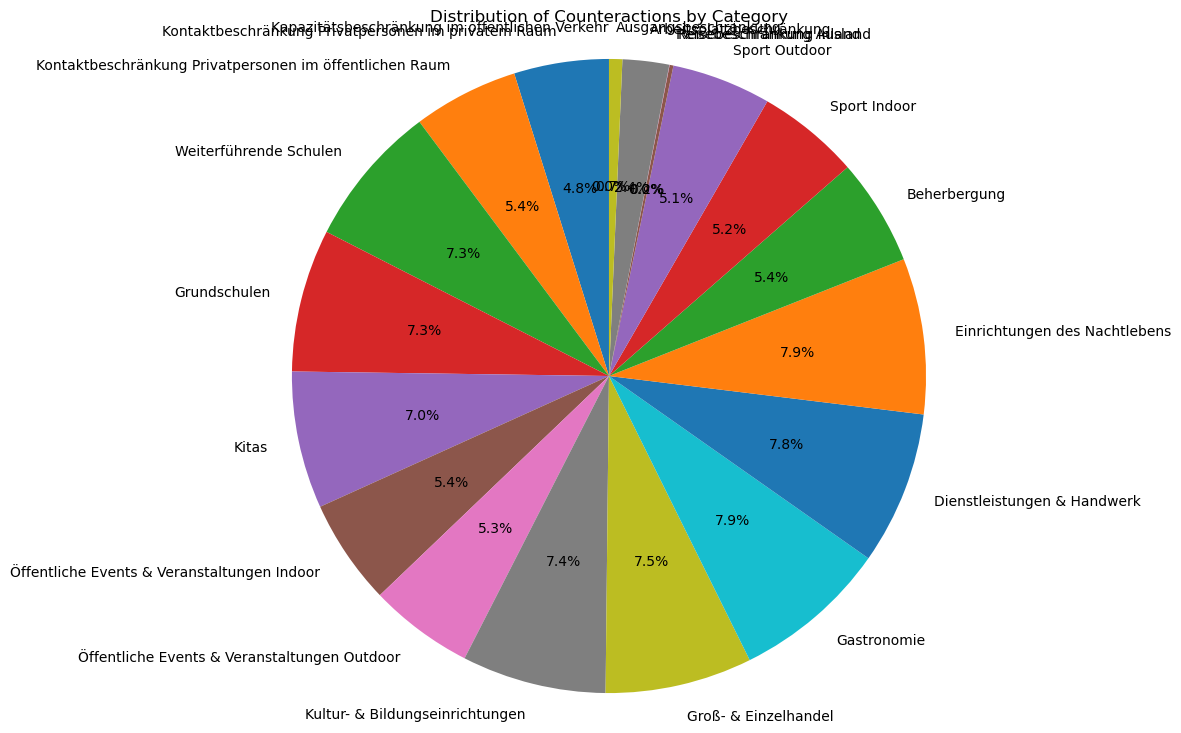

In [108]:
# Calculate the sum of counteractions by category
category_counts = couteractions_test[counteraction_columns].sum()

# Create the pie chart
plt.figure(figsize=(9, 9))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)

# Set the title
plt.title('Distribution of Counteractions by Category')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the chart
plt.show()

In [109]:
correlation_matrix = couteractions_test.iloc[:, 4:].corr()

# Display correlation matrix
print(correlation_matrix)

                                                Weiterführende Schulen  \
Weiterführende Schulen                                        1.000000   
Grundschulen                                                  0.825920   
Kitas                                                         0.554875   
Öffentliche Events & Veranstaltungen Indoor                  -0.029199   
Öffentliche Events & Veranstaltungen Outdoor                 -0.036847   
Kultur- & Bildungseinrichtungen                               0.315575   
Groß- & Einzelhandel                                          0.347282   
Gastronomie                                                   0.380771   
Dienstleistungen & Handwerk                                   0.332689   
Einrichtungen des Nachtlebens                                 0.435497   
Beherbergung                                                  0.035219   
Sport Indoor                                                  0.029132   
Sport Outdoor                         

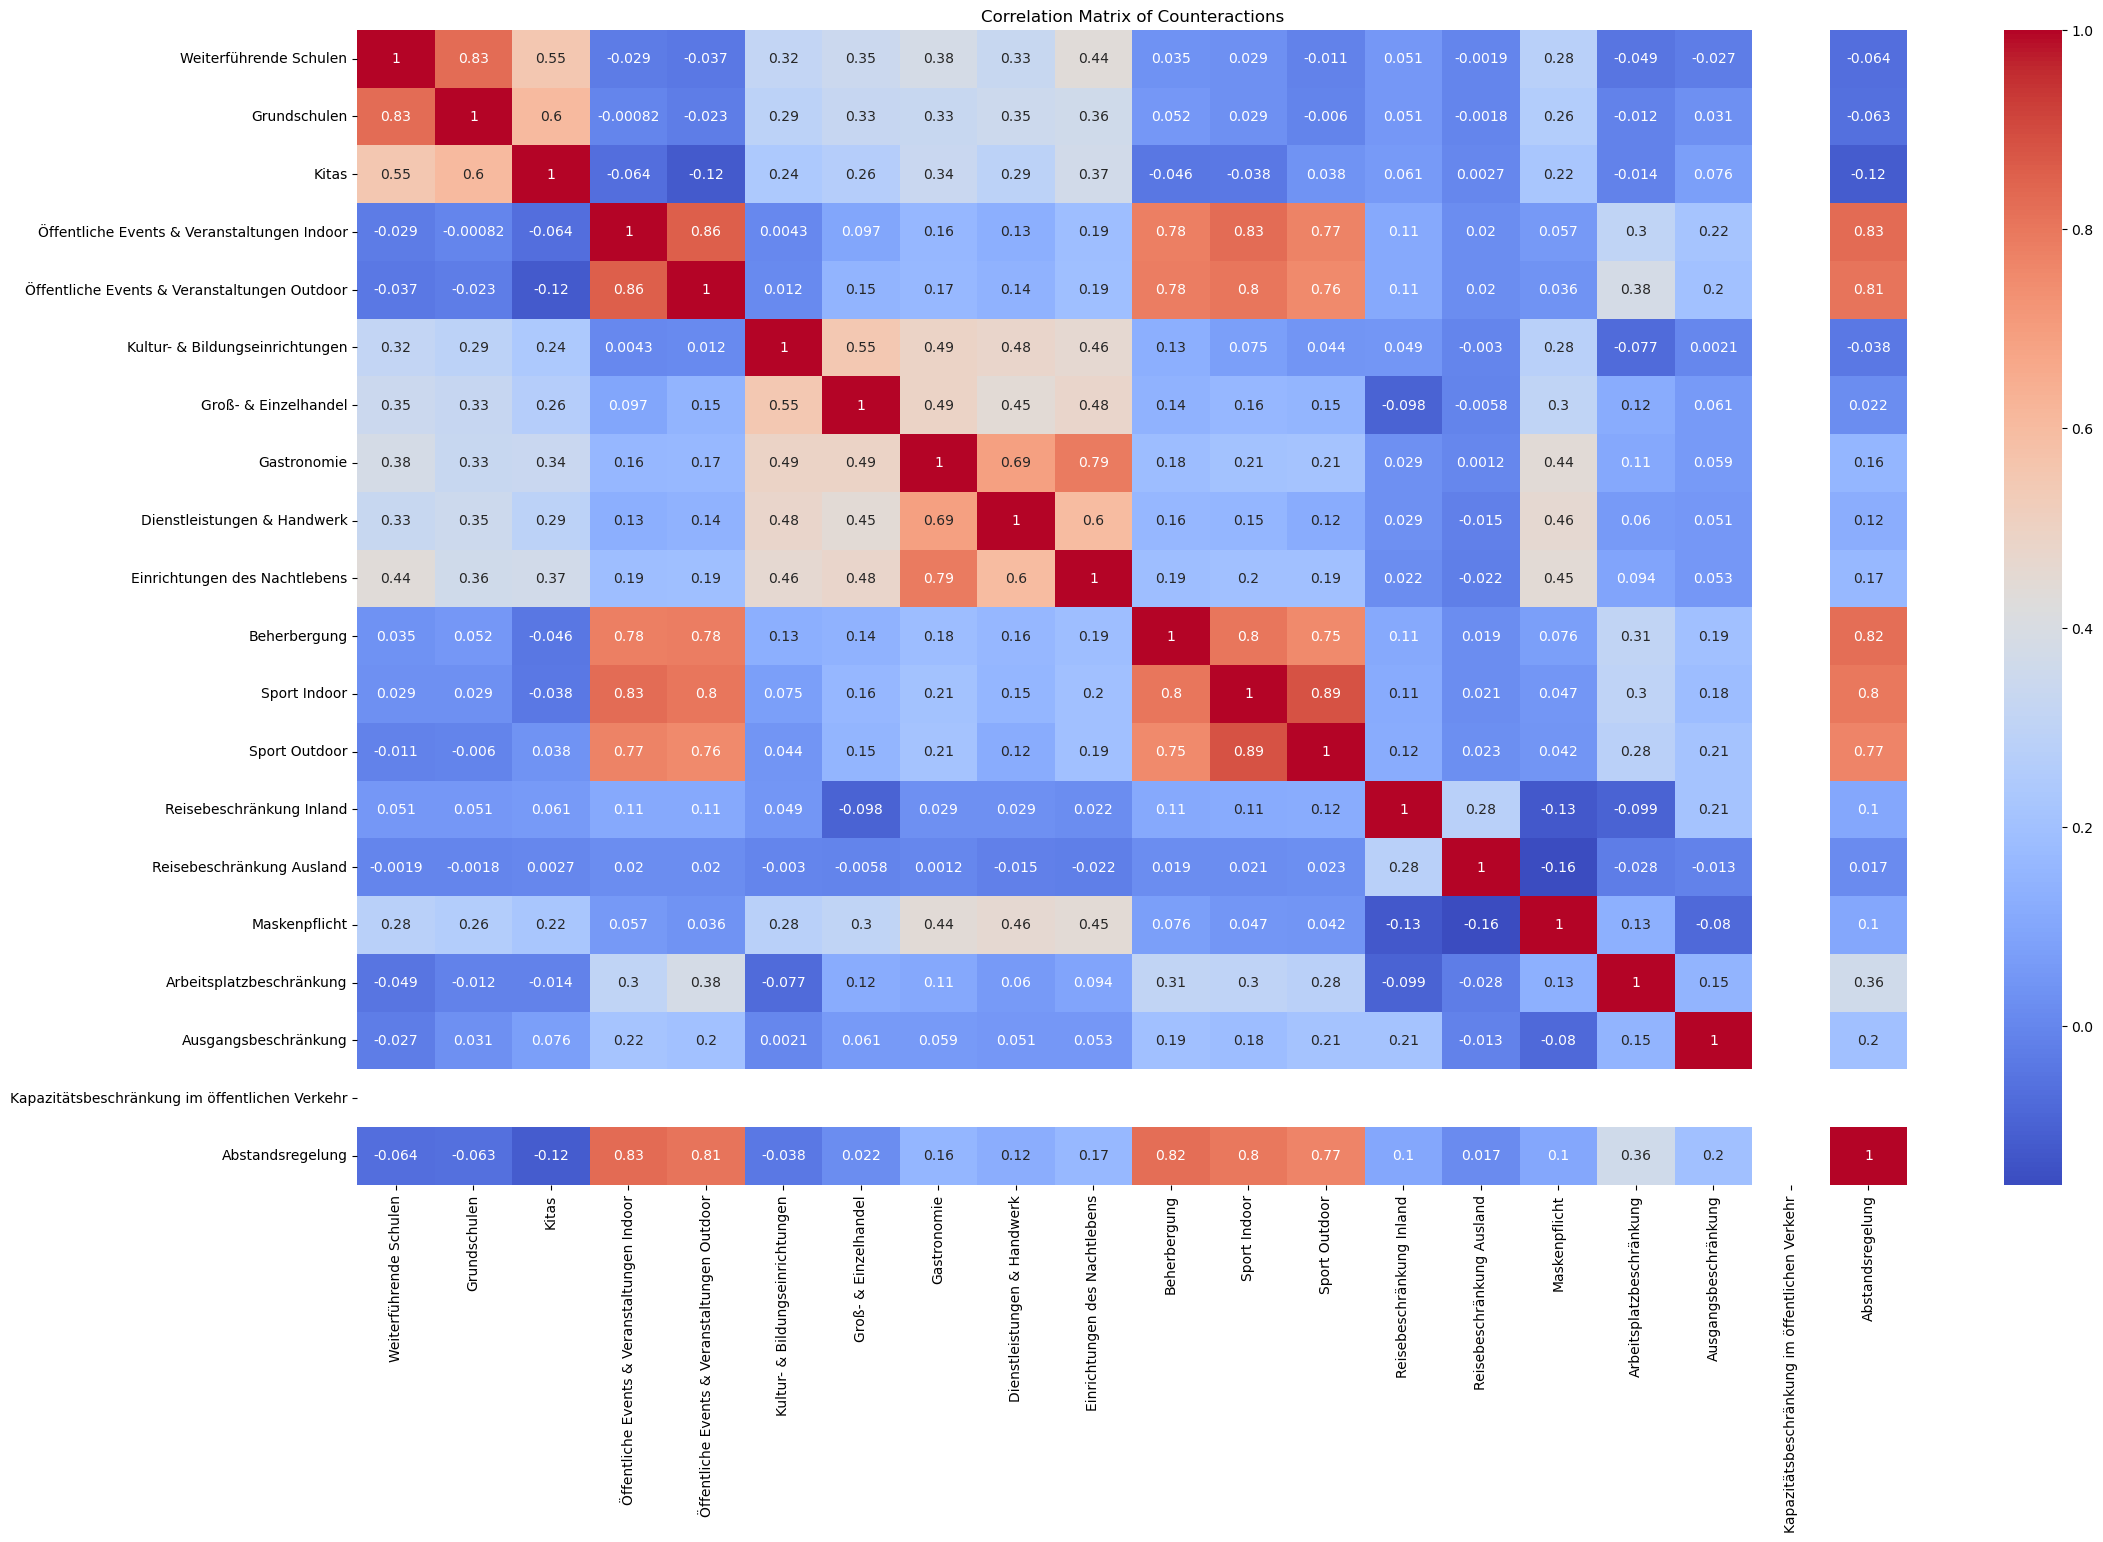

In [114]:
plt.figure(figsize=(25, 15))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix of Counteractions')
plt.show()

<Figure size 2000x1000 with 0 Axes>

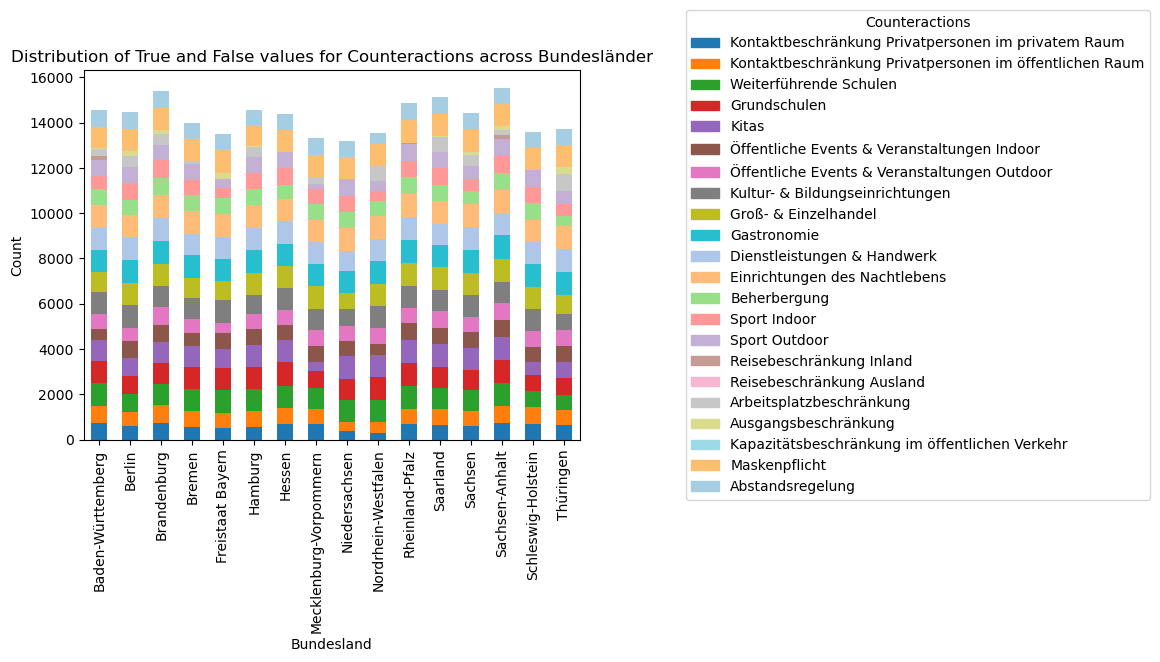

In [140]:
# Select the counteraction columns
counteraction_columns = [
    'Kontaktbeschränkung Privatpersonen im privatem Raum',
    'Kontaktbeschränkung Privatpersonen im öffentlichen Raum',
    'Weiterführende Schulen',
    'Grundschulen',
    'Kitas',
    'Öffentliche Events & Veranstaltungen Indoor',
    'Öffentliche Events & Veranstaltungen Outdoor',
    'Kultur- & Bildungseinrichtungen',
    'Groß- & Einzelhandel',
    'Gastronomie',
    'Dienstleistungen & Handwerk',
    'Einrichtungen des Nachtlebens',
    'Beherbergung',
    'Sport Indoor',
    'Sport Outdoor',
    'Reisebeschränkung Inland',
    'Reisebeschränkung Ausland',
    'Arbeitsplatzbeschränkung',
    'Ausgangsbeschränkung',
    'Kapazitätsbeschränkung im öffentlichen Verkehr',
    'Maskenpflicht',
    'Abstandsregelung'
]

custom_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2',
                  '#7f7f7f', '#bcbd22', '#27becf', '#aec7e8', '#ffbb78', '#98df8a', '#ff9896',
                  '#c5b0d5', '#c49c94', '#f7b6d2', '#c7c7c7', '#dbdb8d', '#9edae5', '#fdbf6f', '#a6cee3']


# Create a bar plot for all counteraction columns
plt.figure(figsize=(20, 10))

# Group the data by 'Bundesland' and calculate the count of True and False values for each counteraction column
grouped_data = couteractions_test.groupby('Bundesland')[counteraction_columns].sum()

# Plot the stacked bar for all counteraction columns with the custom color palette
grouped_data.plot(kind='bar', stacked=True, color=custom_palette)

plt.xlabel('Bundesland')
plt.ylabel('Count')
plt.title('Distribution of True and False values for Counteractions across Bundesländer')

# Create custom legend handles with the specified colors and labels
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in custom_palette]

# Define the position of the legend
legend_position = (1.2, 0.5)  # Adjust the values as needed

plt.legend(legend_handles, counteraction_columns, title='Counteractions', bbox_to_anchor=legend_position, loc='center left')
plt.show()

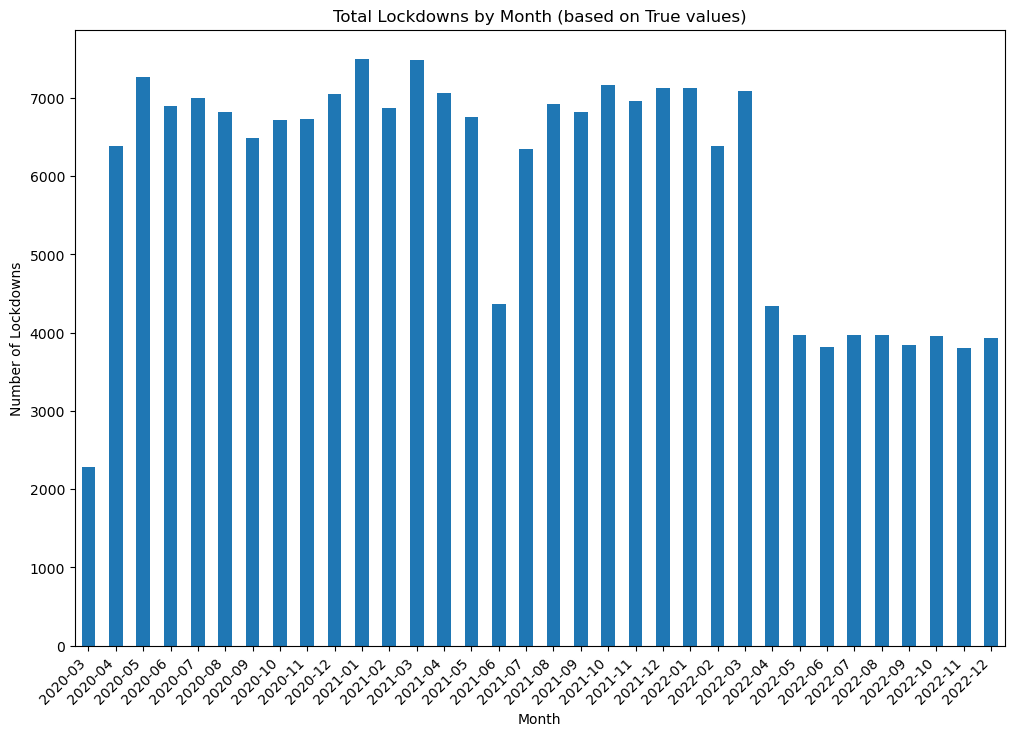

Month with the most lockdowns (based on True values): 2021-01


In [158]:
# Convert 'Datum' column to datetime format
couteractions_test['Datum'] = pd.to_datetime(couteractions_test['Datum'])

# Extract month and year to create 'Month' column
couteractions_test['Month'] = couteractions_test['Datum'].dt.to_period('M')

# Calculate total number of lockdowns (based on true values) for each month
grouped_data = couteractions_test.groupby('Month')[counteraction_columns].apply(lambda x: (x == True).sum())

# Calculate total number of lockdowns for each month
grouped_data['Total Lockdowns'] = grouped_data.sum(axis=1)

# Find month with highest number of lockdowns
most_lockdowns_month = grouped_data['Total Lockdowns'].idxmax()

# Plot bar chart of total lockdowns by month
plt.figure(figsize=(12, 8))
grouped_data['Total Lockdowns'].plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of Lockdowns')
plt.title('Total Lockdowns by Month (based on True values)')

# Format x-axis labels
plt.xticks(rotation=45, ha='right')

plt.show()

print('Month with the most lockdowns (based on True values):', most_lockdowns_month)
